## Table of Contents
* [Dataset visualization 1](#chapter1)
* [Data Preprocessing 2](#chapter2)
    * [Waterfront 2.1](#section_2_1)
    * [View 2.2](#section_2_2)
    * [yr_renovated 2.3](#section_2_3)
    * [Bedrooms 2.4](#section_2_4)
    * [Square Footage 2.5](#section_2_5)
    * [Date 2.6](#section_2_6)
    * [yr_built 2.7](#section_2_7)
    * [Floors 2.8](#section_2_8)
    * [Condition 2.9](#section_2_9)
    * [Sqft_basement 2.10](#section_2_10)
    * [Zipcode, lat and long 2.11](#section_2_11)
    * [Drop columns 2.12](#section_2_12)
    * [Outliers 2.13](#section_2_13)
    * [Final heatmap 2.14](#section_2_14)
* [Machine learning 3](#chapter3)
    * [RandomForestRegressor 3.1](#section_3_1)
    * [LinearRegression 3.2](#section_3_2)
    * [KNeighborsRegressor 3.3](#section_3_3)
    * [Support Vector Regression 3.4](#section_3_4)
    * [DecisionTreeRegressor 3.5](#section_3_5)
    * [Randomized Search 3.6](#section_3_6)
* [Deep Learning 4](#chapter4)
* [Conclusion 5](#chapter5)

## Dataset visualization <a class="anchor" id="chapter1"></a>

- Data visualization help us to understand the data distribution and the quality of it, providing valuable insights into its characteristics;
- The first step involves analyze the data distribuition in order to have a comprehensive perspective of its characteristics.

In [3]:
import pandas as pd
import numpy as np

# data transformed into a pandas Dataframe format
df = pd.read_csv('kc_house_data.csv')

In [4]:
num_keys = df.keys()
shape = df.shape

print(f"The number of features is: {len(num_keys)}\n")
print(f"The list of features is: {num_keys}\n")
print(f"The dataset size is: {shape[0]}")


The number of features is: 21

The list of features is: Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

The dataset size is: 21613


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

- The 'date' should be converted to date format.

In [7]:
#convert 'date' to date format 
df['date'] = pd.to_datetime(df['date']) 

In [8]:
#information of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [9]:
# calculates the mean, median, Q1, Q3, min, max and standard deviation
df.describe()

id                           date         price  \
count  2.161300e+04                          21613  2.161300e+04   
mean   4.580302e+09  2014-10-29 04:38:01.959931648  5.400881e+05   
min    1.000102e+06            2014-05-02 00:00:00  7.500000e+04   
25%    2.123049e+09            2014-07-22 00:00:00  3.219500e+05   
50%    3.904930e+09            2014-10-16 00:00:00  4.500000e+05   
75%    7.308900e+09            2015-02-17 00:00:00  6.450000e+05   
max    9.900000e+09            2015-05-27 00:00:00  7.700000e+06   
std    2.876566e+09                            NaN  3.671272e+05   

           bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  21613.000000  21613.000000  21613.000000  2.161300e+04  21613.000000   
mean       3.370842      2.114757   2079.899736  1.510697e+04      1.494309   
min        0.000000      0.000000    290.000000  5.200000e+02      1.000000   
25%        3.000000      1.750000   1427.000000  5.040000e+03      1.000000   
50%        3.000000      2.250000   1910.000000  7.618000e+03      1.500000   
75%        4.000000      2.500000   2550.000000  1.068800e+04      2.000000   
max       33.000000      8.000000  13540.000000  1.651359e+06      3.500000   
std        0.930062      0.770163    918.440897  4.142051e+04      0.539989   

         waterfront          view  ...         grade    sqft_above  \
count  21613.000000  21613.000000  ...  21613.000000  21613.000000   
mean       0.007542      0.234303  ...      7.656873   1788.390691   
min        0.000000      0.000000  ...      1.000000    290.000000   
25%        0.000000      0.000000  ...      7.000000   1190.000000   
50%        0.000000      0.000000  ...      7.000000   1560.000000   
75%        0.000000      0.000000  ...      8.000000   2210.000000   
max        1.000000      4.000000  ...     13.000000   9410.000000   
std        0.086517      0.766318  ...      1.175459    828.090978   

       sqft_basement      yr_built  yr_renovated       zipcode           lat  \
count   21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean      291.509045   1971.005136     84.402258  98077.939805     47.560053   
min         0.000000   1900.000000      0.000000  98001.000000     47.155900   
25%         0.000000   1951.000000      0.000000  98033.000000     47.471000   
50%         0.000000   1975.000000      0.000000  98065.000000     47.571800   
75%       560.000000   1997.000000      0.000000  98118.000000     47.678000   
max      4820.000000   2015.000000   2015.000000  98199.000000     47.777600   
std       442.575043     29.373411    401.679240     53.505026      0.138564   

               long  sqft_living15     sqft_lot15  
count  21613.000000   21613.000000   21613.000000  
mean    -122.213896    1986.552492   12768.455652  
min     -122.519000     399.000000     651.000000  
25%     -122.328000    1490.000000    5100.000000  
50%     -122.230000    1840.000000    7620.000000  
75%     -122.125000    2360.000000   10083.000000  
max     -121.315000    6210.000000  871200.000000  
std        0.140828     685.391304   27304.179631  

[8 rows x 21 columns]

- Given the 21 different features, it is necessary to assess how each feature relates to the final house price;
- Furthermore, the data types of each feature and the presence of any 'NaN' values should be carefully reviewed. To accomplish these two points, the next step involves data preprocessing.   

## Data Preprocessing <a class="anchor" id="chapter2"></a>

Data preprocessing allows the machine learning models to solve problems such as classification and regression. Commonly employed techniques as data preprocessing include replacing the missing values with the most frequent value, known as mode, the mean, or the median for each feature.
- First off, it will be studied the missing values in each feature.

In [6]:
#count the number of 'NaN' values of each feature
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

- There aren't missing values in this dataset;
- After, it will be exam the duplicated values. 

In [7]:
#measure the number of duplicated values
print(f"{df.duplicated().value_counts()}\n")
print('No missing values were detected.')

False    21613
Name: count, dtype: int64

No missing values were detected.


In [10]:
# drop the 'id' collumn
df.drop(['id'], axis=1,inplace=True)

- The 'id' column does not increse the knowledge in the machine learning system.

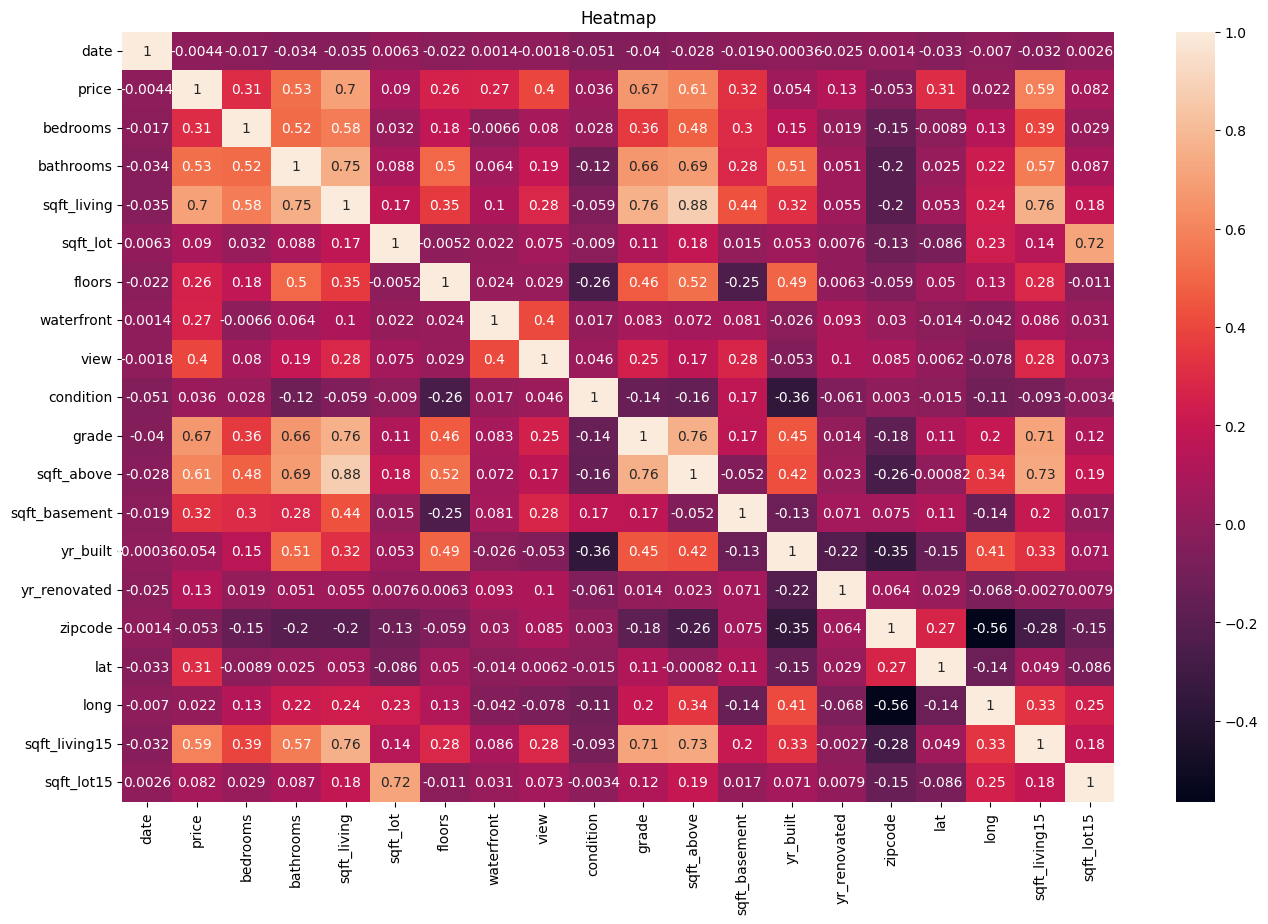

In [11]:
import seaborn as sb
import matplotlib.pyplot as plt

table = df.corr()

plt.figure(figsize=(16,10))
sb.heatmap(table, annot=True)
plt.title('Heatmap')
plt.show()

- The main propose of this work is predict the prices of the houses, so it is necessary filter the features, in order to eliminate superfluous information and focus on the most meaningful aspects; 
- The heatmap presents a visual correlation between the features. As it can tell, there are many features to taking into account, therefore it is crucial to identify those that have a strong correlation with the 'price' feature to simplify the analysis. An higher correlation values translates into a better prediction of the 'price'. 

In [11]:
def filter(heatmap, target):

    drop_features = []
    for i in heatmap:
        if heatmap[i][target] < 0.5:
            drop_features.append(i)
    return drop_features

print(f"Features that should be eliminated, only analyzing the correlation values:{filter(table, 'price')}")

Features that should be eliminated, only analyzing the correlation values:['date', 'bedrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_lot15']


- Only observing the correlation the following features must be discarded:'date', 'bedrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_lot15';
- However, this analysis is not enough. Other metrics should be measured, such as the data values and the redundancy of features (analyze the difference between sqft_lot and sqft_lot15, eg). 

### Waterfront <a class="anchor" id="section_2_1"></a>

Number of unique values is 2, being 0 and 1



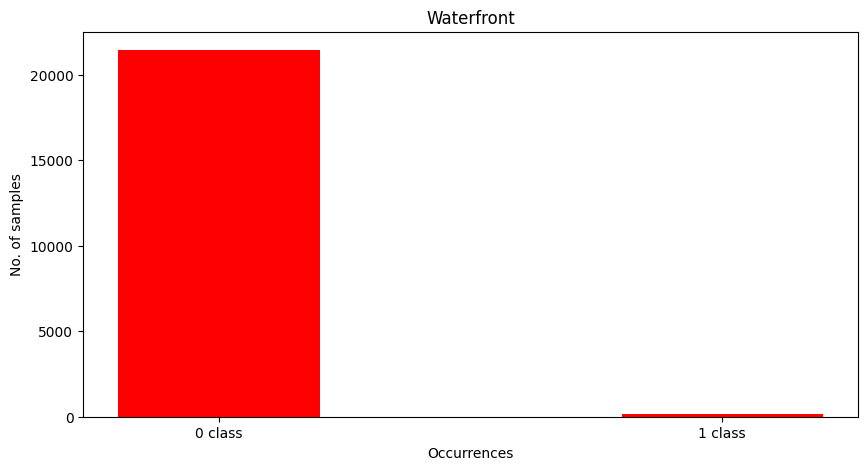

In [14]:
#unique values
wat = df['waterfront'].unique()

print(f"Number of unique values is {len(wat)}, being {wat[0]} and {wat[1]}\n")

values = df['waterfront'].value_counts()

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(['0 class','1 class'], [values[0], values[1]], color ='red', 
        width = 0.4)
 
plt.xlabel("Occurrences")
plt.ylabel("No. of samples")
plt.title("Waterfront")
plt.show()

- As it can tell, the 'waterfront' features is majority 0's, therefore could be discarded, due to its lack of information that can give to the machine learning model. 

### View <a class="anchor" id="section_2_2"></a>

Number of unique values is 5, being 0, 1, 2, 3 and 4



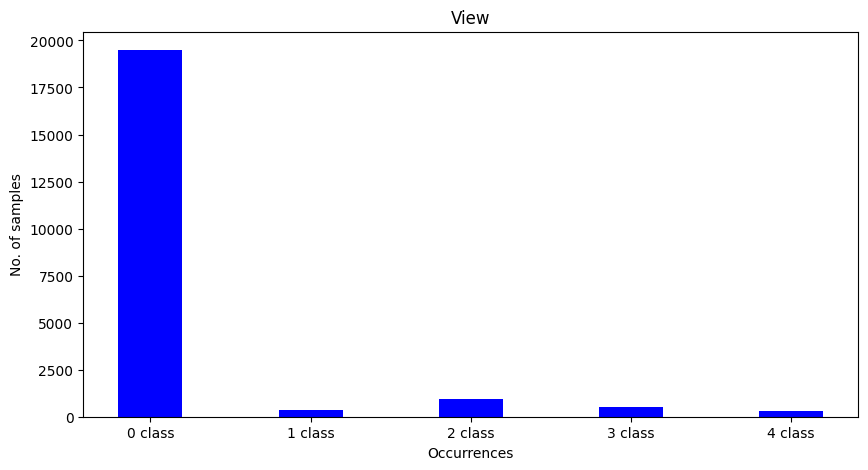

In [15]:
view = df['view'].unique()

print(f"Number of unique values is {len(view)}, being {view[0]}, {view[4]}, {view[3]}, {view[1]} and {view[2]}\n")

values = df['view'].value_counts()

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(['0 class','1 class', '2 class', '3 class', '4 class'], [values[0], values[1], values[2], values[3], values[4]], color ='blue', 
        width = 0.4)
 
plt.xlabel("Occurrences")
plt.ylabel("No. of samples")
plt.title("View")
plt.show()

- Once again, the number of 0 class is higher than the remaining 4, so it was deleted.

### yr_renovated <a class="anchor" id="section_2_3"></a>

In [16]:
yr = df['yr_renovated'].unique()

print(f"Number of unique values is {len(yr)}, being {yr}\n")

Number of unique values is 70, being [   0 1991 2002 2010 1999 1992 2013 1994 1978 2005 2008 2003 1984 1954
 2014 2011 1974 1983 1945 1990 1988 1957 1977 1981 1995 2000 1998 1970
 1989 2004 1986 2009 2007 1987 1973 2006 1985 2001 1980 1971 1979 1997
 1950 1969 1948 2015 1968 2012 1963 1951 1993 1962 1996 1972 1953 1955
 1982 1956 1940 1976 1946 1975 1958 1964 1959 1960 1967 1965 1934 1944]



In [17]:
df['yr_renovated'].value_counts()

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

- In the 'yr_renovated' there are 70 unique values, however the majority of them are 0. Being said, it will not be selected as a feature for the machine learining model.  

### Bedrooms <a class="anchor" id="section_2_4"></a>

In [18]:
bed = df['bedrooms'].unique()

print(f"Number of unique values is {len(bed)}, being {bed}\n")

Number of unique values is 13, being [ 3  2  4  5  1  6  7  0  8  9 11 10 33]



In [21]:
df['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [22]:
print(f"Correlation value is: {df['bedrooms'].corr(df['price'])}")

Correlation value is: 0.308349598145638


- Despite having a correlation with the 'price' lower than 0.5, the 'bedroom' feature will not be deleted due to its intrinsic relevance to house characteristics.   

### Square Footage <a class="anchor" id="section_2_5"></a>

- There are two features that represent the house lot, which are 'sqft_lot' and 'sqft_lot15'. The lot describes the total area of the property, therefore it can not be depreciated;
- It will be selected one, taking into account the higher correlation value with 'price'.

In [23]:
print(f"The correlation value of 'sqft_lot' is: {df['sqft_lot'].corr(df['price'])}, while the correlation value of 'sqft_lot15' is: {df['sqft_lot15'].corr(df['price'])}")

The correlation value of 'sqft_lot' is: 0.08966086058710017, while the correlation value of 'sqft_lot15' is: 0.08244715251948598


- Taking a closer look for the results, the 'sqft_lot15' will be eliminated.

### Date <a class="anchor" id="section_2_6"></a>

- The 'date' does not increase the knowledge of the 'price' because it has a negative correlation with the other features. Being said, it will be deleted for this study.  

### yr_built <a class="anchor" id="section_2_7"></a>

- 'yr_Built' describes the built year of the house.

In [24]:
built = df['yr_built'].unique()

print(f"Number of unique values is {len(built)}, being {built}\n")

Number of unique values is 116, being [1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 1942 1927 1977 1900
 1979 1994 1916 1921 1969 1947 1968 1985 1941 1915 1909 1948 2005 1929
 1981 1930 1904 1996 2000 1984 2014 1922 1959 1966 1953 1950 2008 1991
 1954 1973 1925 1989 1972 1986 1956 2002 1992 1964 1952 1961 2006 1988
 1962 1939 1946 1967 1975 1980 1910 1983 1978 1905 1971 2010 1945 1924
 1990 1914 1926 2004 1923 2007 1976 1949 1999 1901 1993 1920 1997 1943
 1957 1940 1918 1928 1974 1911 1936 1937 1982 1908 1931 1998 1913 2013
 1907 1958 2012 1912 2011 1917 1932 1944 1902 2009 1903 1970 2015 1934
 1938 1919 1906 1935]



In [43]:
df['yr_built'].value_counts()

yr_built
2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: count, Length: 116, dtype: int64

- The values are not to much unbalanced, like the previous ones. The built year is a house characteristic, therefore it will not be ignored.  

### Floors <a class="anchor" id="section_2_8"></a>

Number of unique values is 6, being [1.  2.  1.5 3.  2.5 3.5]



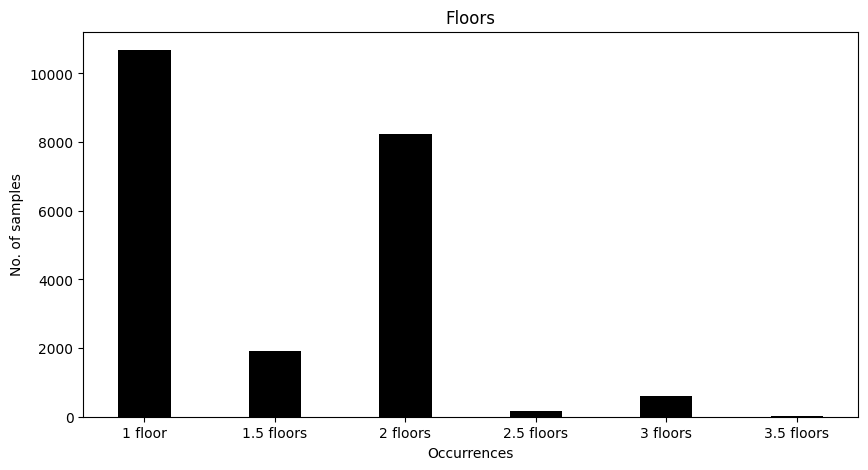

In [80]:
floor = df['floors'].unique()

print(f"Number of unique values is {len(floor)}, being {floor}\n")

values = df['floors'].value_counts()

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(['1 floor','1.5 floors', '2 floors', '2.5 floors', '3 floors', '3.5 floors'], [values[1], values[1.5], values[2], values[2.5], values[3], values[3.5]], color ='black', 
        width = 0.4)
 
plt.xlabel("Occurrences")
plt.ylabel("No. of samples")
plt.title("Floors")
plt.show()

- The number of floors is a fundamental aspect of a house's structure, making it essential to retain in the data analysis.

### Condition <a class="anchor" id="section_2_9"></a>

Number of unique values is 5, being [3 5 4 1 2]



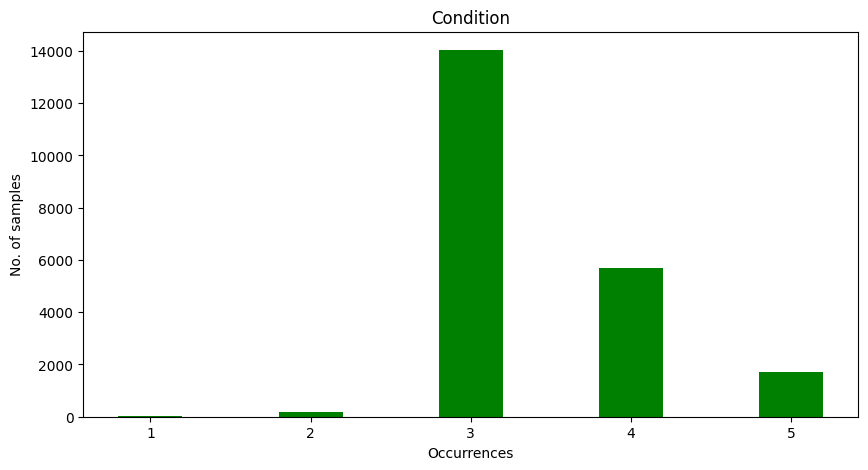

In [81]:
cd = df['condition'].unique()

print(f"Number of unique values is {len(cd)}, being {cd}\n")

values = df['condition'].value_counts()

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(['1', '2', '3', '4', '5'], [values[1], values[2], values[3], values[4], values[5]], color ='green', 
        width = 0.4)
 
plt.xlabel("Occurrences")
plt.ylabel("No. of samples")
plt.title("Condition")
plt.show()

- Based on the analysis, the 'conditions' feature does not seem to have a substantial impact on the price of a house, so it can be eliminated.

### Sqft_basement <a class="anchor" id="section_2_10"></a>

A basement may not directly translate into a higher monetary value, but it significantly enhances the livability and comfort of a home.

In [82]:
cd = df['sqft_basement'].unique()

print(f"Number of unique values is {len(cd)}, being {cd}\n")

Number of unique values is 306, being [   0  400  910 1530  730 1700  300  970  760  720  700  820  780  790
  330 1620  360  588 1510  410  990  600  560  550 1000 1600  500 1040
  880 1010  240  265  290  800  540  380  710  840  770  480  570 1490
  620 1250 1270  120  650  180 1130  450 1640 1460 1020 1030  750  640
 1070  490 1310  630 2000  390  430  850  210 1430 1950  440  220 1160
  860  580 2060 1820 1180  200 1150 1200  680  530 1450 1170 1080  960
 1100  280  870  460 1400 1320  660 1220  900  420 1580 1380  475  690
  270  350  935 1370  980 1470  160  950   50  740 1780 1900  340  470
  370  140 1760  130  610  520  890 1110  150 1720  810  190 1290  670
 1800 1120 1810   60 1050  940  310  930 1390 1830 1300  510 1330 1590
  920 1420 1240 1960 1560 2020 1190 2110 1280  250 2390 1230  170  830
 1260 1410 1340  590 1500 1140  260  100  320 1480 1060 1284 1670 1350
 2570 2590 1090  110 2500   90 1940 1550 2350 2490 1481 1360 1135 1520
 1850 1660 2130 2600 1690  243 1210 262

In [83]:
df['sqft_basement'].value_counts()

sqft_basement
0      13126
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: count, Length: 306, dtype: int64

- The 'sqft_basement' has no value to the problem because there are other features that already describes de area of the house. Therefore it will be discarded.

### Zipcode, lat and long <a class="anchor" id="section_2_11"></a>

- While the 'zipcode', 'lat', and 'long' features may not directly correlate with the 'price' feature, they provide valuable information about the house's location.

### Drop the columns <a class="anchor" id="section_2_12"></a>

In [12]:
# drop the 'waterfront' collumn
df.drop(['waterfront'], axis=1,inplace=True)

# drop the 'view' collumn
df.drop(['view'], axis=1,inplace=True)

# drop the 'yr_renovated' collumn
df.drop(['yr_renovated'], axis=1,inplace=True)

# drop the 'sqft_lot15' collumn
df.drop(['sqft_lot15'], axis=1,inplace=True)

# drop the 'condition' collumn
df.drop(['condition'], axis=1,inplace=True)

# drop the 'sqft_basement' collumn
df.drop(['sqft_basement'], axis=1,inplace=True)

# drop the 'date' collumn
df.drop(['date'], axis=1,inplace=True)


In [13]:
# final features list

print(f"Final feature list is:{df.keys()}")

Final feature list is:Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'grade', 'sqft_above', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15'],
      dtype='object')


### Outliers <a class="anchor" id="section_2_13"></a>

- The outliers represent an anomaly in a random sample, exhibiting an unusual distance compared to the rest of the data. These anomaly are classified as 'contaminations';
- In order to see outliers, it is usual visualize the box plot.

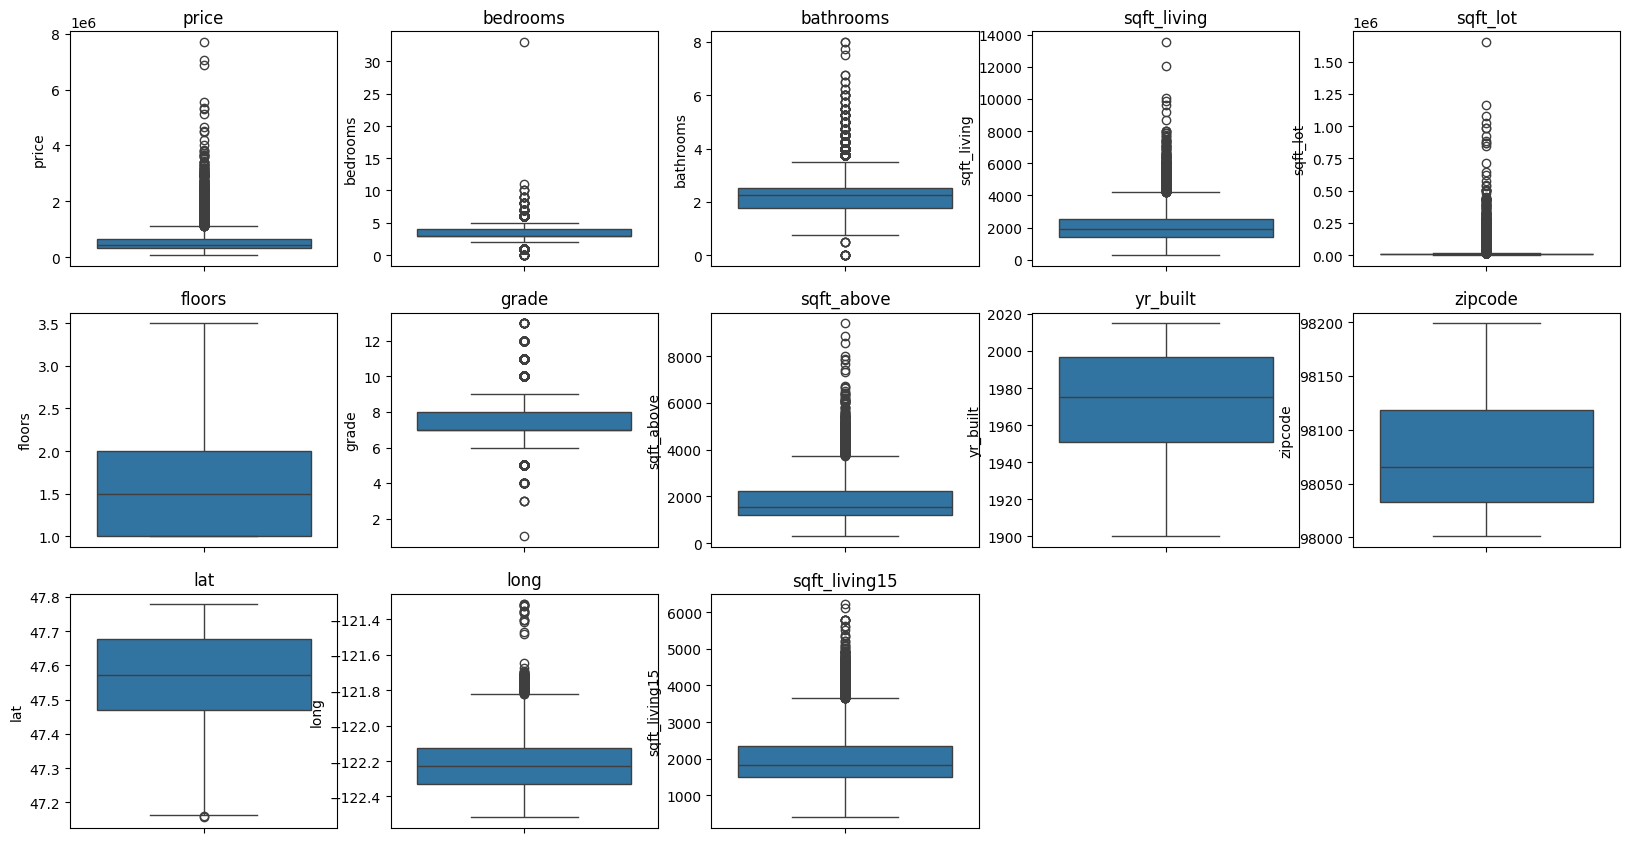

In [14]:
plt.figure(figsize=(20, 14))

for i in df.columns.to_list():
    plt.subplot(4, 5, df.columns.to_list().index(i)+1)
    sb.boxplot(data=df[i])
    plt.title(i)
plt.show()

- Due to the presence of numerous outliers in the data, it is essential to address them and mitigate their impact;
- The elimination of outliers could be made by the z-score or interquartile range. The adopted method was z-score;
- The outliers will be replaced by the median of the feature.  

In [14]:
import numpy as np
from scipy import stats

for i in df.keys():
    z = np.abs(stats.zscore(df[i]))

    df.loc[z > 3, i] = df[i].median() #usualy a z-score greater than 3 is considered an outlier

    df.loc[z < -3, i] = df[i].median() #usualy a z-score less than 3 is considered an outlier


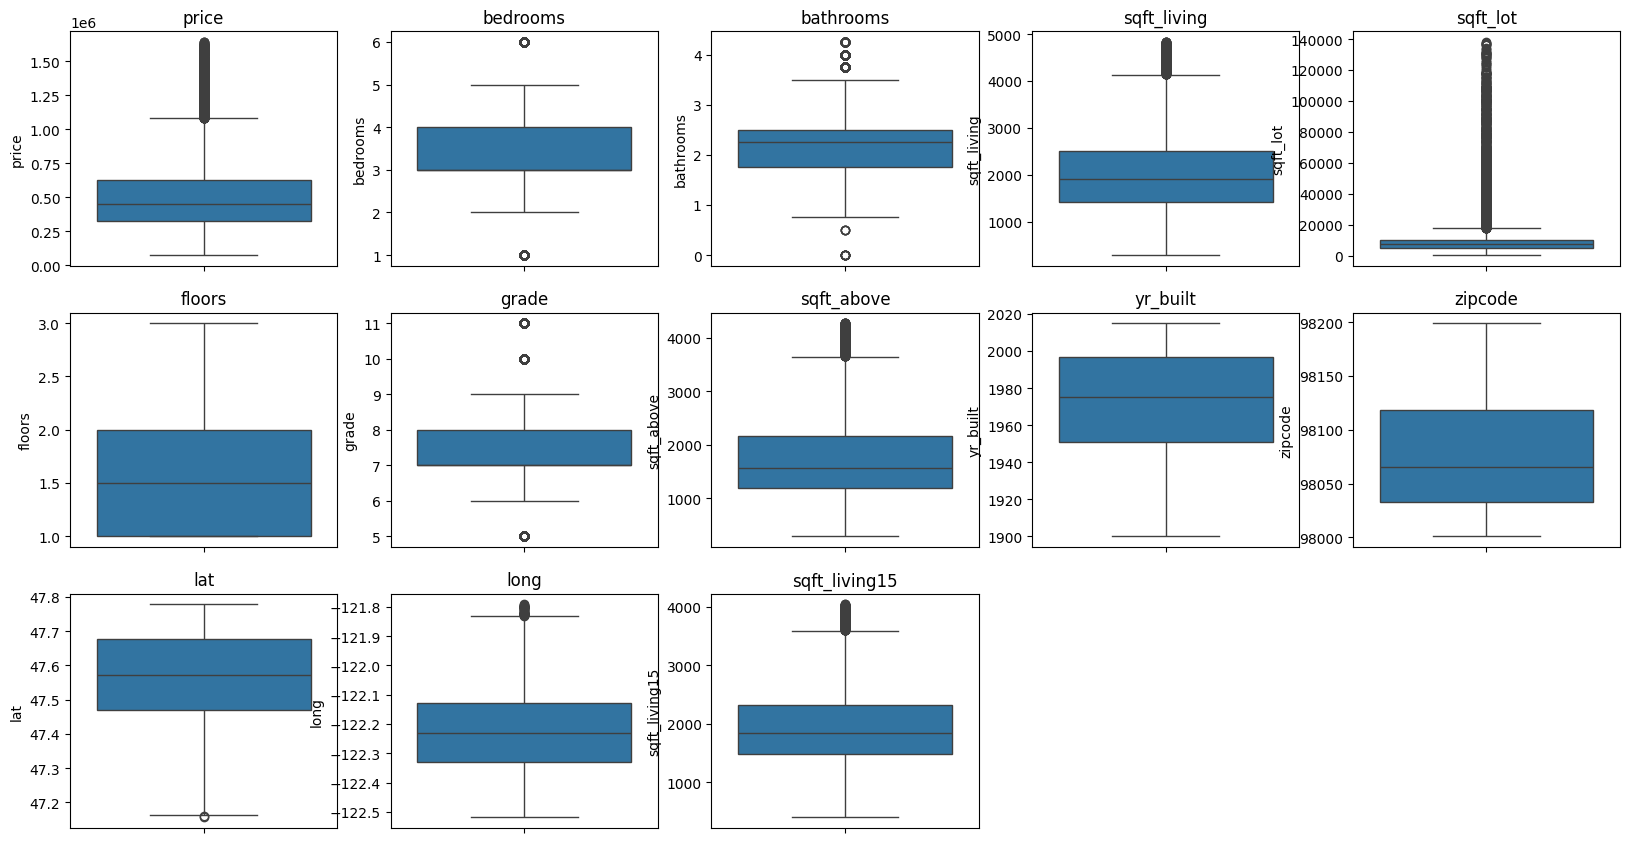

In [15]:
plt.figure(figsize=(20, 14))

for i in df.columns.to_list():
    plt.subplot(4, 5, df.columns.to_list().index(i)+1)
    sb.boxplot(data=df[i])
    plt.title(i)
plt.show()

- The replacing with the median was efective and mitigate the outliers, in some cases.

### Final heatmap <a class="anchor" id="section_2_14"></a>

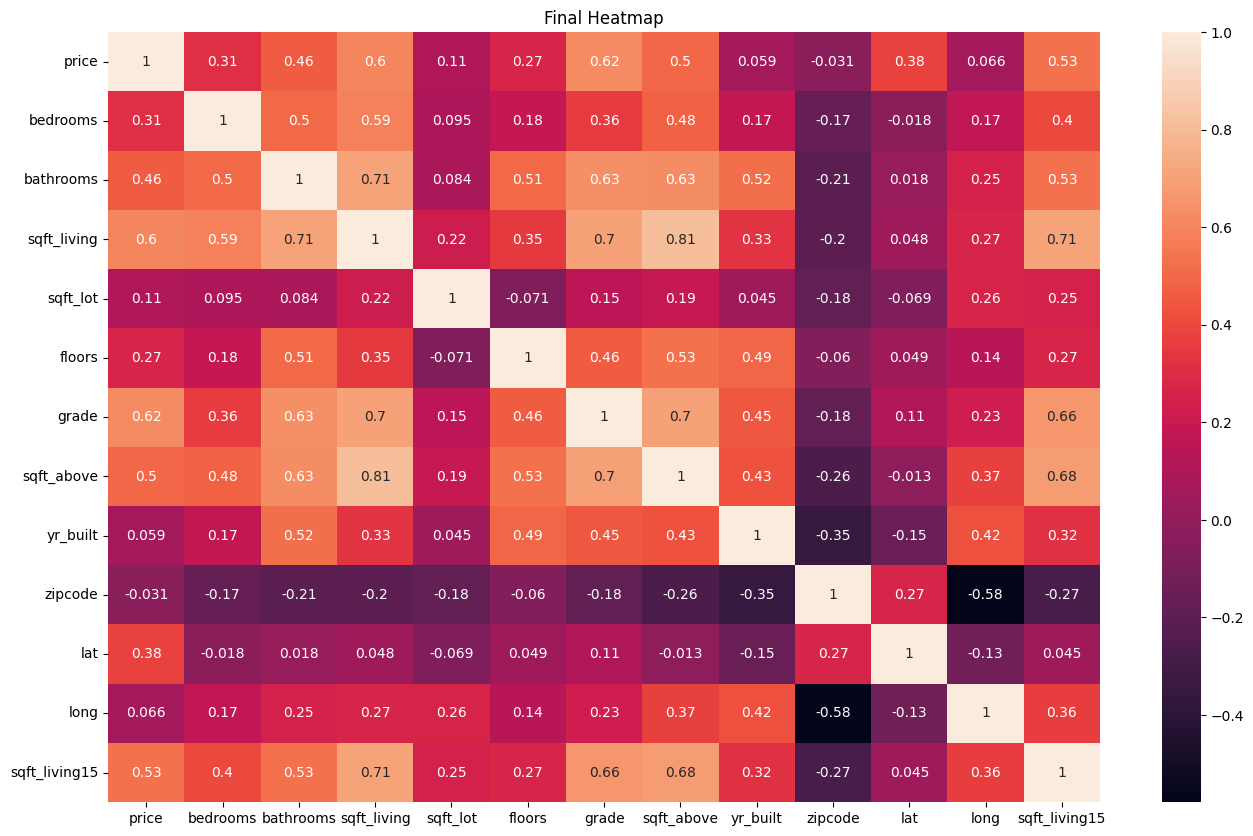

In [13]:
import seaborn as sb
import matplotlib.pyplot as plt

table = df.corr()

plt.figure(figsize=(16,10))
sb.heatmap(table, annot=True)
plt.title('Final Heatmap')
plt.show()

## Machine learning <a class="anchor" id="chapter3"></a>

- With data preprocessing completed and had understood the data distribution, the subsequent step is searching of a machine learning model. Machine learning tasks can be categorized in two main types: classification and regression. Since this is a regression problem, it will be selected models that are specifically designed for this type of task;
- It will be explored the following models: RandomForestRegressor, LinearRegression, KNeighborsRegressor, Support Vector Regression and DecisionTreeRegressor;
- Being a regression problem, it will be optimized by maximizing the R2 (coefficient of determination) and Mean Absolute Error.

In [16]:
# dataset
x = df.drop(columns=['price']) #features
y = df['price'] #labels

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , r2_score

x_train , x_test , y_train , y_test = train_test_split(x ,y ,test_size=0.25 , random_state=0)

print(f"X_train size:{x_train.shape} and X_test size:{x_test.shape}")

X_train size:(16209, 12) and X_test size:(5404, 12)


### RandomForestRegressor <a class="anchor" id="section_3_1"></a>

- This type of machine learning model is an algorithm that has multiple decisions trees in it. The final result will be be voting of each decision tree. The Random Forest applied has 100 decision trees, by default, with a depth of 5 layers.

In [17]:

from sklearn.ensemble import RandomForestRegressor

RRG = RandomForestRegressor(max_depth=5)

RRG.fit(x_train,y_train)

RandomForestRegressor(max_depth=5)

In [18]:
from sklearn.metrics import mean_absolute_error , r2_score

y_pred = RRG.predict(x_test)

print(f"Mean Absolute Error is:{mean_absolute_error(y_test,y_pred)} and R2 is:{r2_score(y_test,y_pred)}")

Mean Absolute Error is:95477.9428500721 and R2 is:0.6641059037285901


### LinearRegression <a class="anchor" id="section_3_2"></a>

- Applies a linear approximation to both the input and output, simplifying the underlying data representation. 

In [161]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(x_train,y_train)

LinearRegression()

In [162]:
from sklearn.metrics import mean_absolute_error , r2_score

y_pred = LR.predict(x_test)

print(f"Mean Absolute Error is:{mean_absolute_error(y_test,y_pred)} and R2 is:{r2_score(y_test,y_pred)}")

Mean Absolute Error is:109235.29062870162 and R2 is:0.600622056770203


### KNeighborsRegressor <a class="anchor" id="section_3_3"></a>

- K-nearest neighbors applies a supervised learining, where the target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set. The number of neighbors will be 15.

In [179]:
from sklearn.neighbors import KNeighborsRegressor

KNR = KNeighborsRegressor(n_neighbors=15)

KNR.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=15)

In [180]:
from sklearn.metrics import mean_absolute_error , r2_score

y_pred = KNR.predict(x_test)

print(f"Mean Absolute Error is:{mean_absolute_error(y_test,y_pred)} and R2 is:{r2_score(y_test,y_pred)}")

Mean Absolute Error is:138724.24211695042 and R2 is:0.4370621071472297


### Support Vector Regression <a class="anchor" id="section_3_4"></a>

- Support Vector Regression is like the Support Vector Machine, where gives the flexibility to define how much error is acceptable in the model and will find an appropriate line to fit the data.

In [181]:
from sklearn.svm import SVR

SV = SVR()

SV.fit(x_train,y_train)

SVR()

In [182]:
from sklearn.metrics import mean_absolute_error , r2_score

y_pred = SV.predict(x_test)

print(f"Mean Absolute Error is:{mean_absolute_error(y_test,y_pred)} and R2 is:{r2_score(y_test,y_pred)}")

Mean Absolute Error is:186227.3813781775 and R2 is:-0.04093472575751789


### DecisionTreeRegressor <a class="anchor" id="section_3_5"></a>

- Decision Trees have the main goal to create a model, by learning simple decisions rules, that predict the target. This simple decisions could be if-else decision. The max_depth will be 6.

In [191]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor(max_depth=6)

DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=6)

In [192]:
from sklearn.metrics import mean_absolute_error , r2_score

y_pred = DT.predict(x_test)

print(f"Mean Absolute Error is:{mean_absolute_error(y_test,y_pred)} and R2 is:{r2_score(y_test,y_pred)}")

Mean Absolute Error is:96141.66608993155 and R2 is:0.6607797366525094


- The machine learning models should be searching for a low MAE and a high R2;
- The best model was RandomForestRegressor, achieving 95464.42500806112 and 0.6636129329419377 for MAE and R2, respectively. The worst model was Support Vector Regression, only acquiring 186227.3813781775 of MAE and :-0.04093472575751789 of R2;
- A closer inspection of the model predictions revealed that excessively complex models exhibited difficulties in accurately estimating house prices, emphasizing the virtue of simplicity in machine learning.

### Randomized Search <a class="anchor" id="section_3_6"></a>

- For machine learning systems there are methods that could be implemented in order to optimize the selected algorithm. Randomized Search is a stocastic method that randomly passes the set of hyperparameters and calculate the score and gives the best set of hyperparameters which gives the best score as an output;
- This optimization model will be applied to fine-tune the parameters of the RandomForestRegressor, hoping to achieve a best performance;
- All parameters were selected randomly.

In [19]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

RFG = RandomForestRegressor()

# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = RFG, param_distributions = random_grid, n_iter = 100, cv=2, verbose=2, random_state=42)

rf_random.fit(x_train, y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  20.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  19.0s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  17.7s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  17.5s
[CV] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators

/home/joaolavinas/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/home/joaolavinas/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/joaolavinas/.local/lib/python3.10/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/joaolavinas/.local/lib/python3.10/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  Fi

RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [20]:
from sklearn.metrics import mean_absolute_error , r2_score

y_pred = rf_random.predict(x_test)

print(f"Mean Absolute Error is:{mean_absolute_error(y_test,y_pred)} and R2 is:{r2_score(y_test,y_pred)}")

Mean Absolute Error is:70427.21357397297 and R2 is:0.7799155340262087


- As it can tell, Randomized Seach increase the R2 up to 0.78, meanwhile decrease MAE. The implementation of this approach garantee a better performance. Grid search could be another option, but it is likely to be less effective, as it requires manual selection of the parameters and does not explore a wide range of values.  

## Deep Learning <a class="anchor" id="chapter4"></a>

- Deep learning is a subset of machine learning, where the models has the ability to recognize patterns that are in the dataset. This type of machine learning systems have a high potential not just for classification but also for regression tasks;
- Given the limited memory capacity, only MLPs (multi-layer perceptrons) will be considered for our deep learning studies.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

- Usually, for deep learning models is created a validation dataset, in order to monitorize the learning.

In [20]:
print(f"Train dataset size:{X_train.shape}, validation size:{X_val.shape} and test size:{x_test.shape}")

Train dataset size:(12967, 12), validation size:(4323, 12) and test size:(5404, 12)


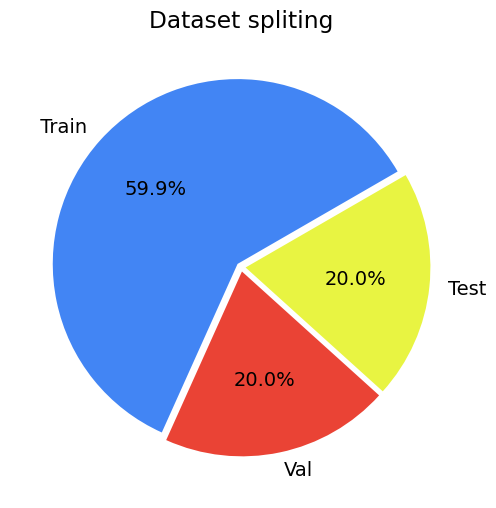

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#e8f442']
plt.rcParams.update({'font.size': 14})
plt.pie([len(X_train.value_counts()),
         len(X_val.value_counts()),
         len(X_test.value_counts())],
        labels=[' Train', 'Val','Test'],
        colors=colors, autopct='%.1f%%', explode=(0.025,0.025, 0.025),
        startangle=30);
plt.title('Dataset spliting')
plt.show()

In [63]:
from torch.utils.data import Dataset
import torch
import numpy as np
import random
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision
from torchvision.transforms.functional import InterpolationMode
import torchvision.transforms as T
import torch.nn.functional as F

class PriceDataset(Dataset):
    def __init__(self, X, Y) -> None: #input of dataset
        super(PriceDataset,self).__init__()
        self.X = X
        self.Y = Y

    def __getitem__(self, index) -> dict:
        data = self.X.iloc[index]
        label = self.Y.iloc[index]

        #transform to a torch tensor
        data = torch.tensor(data)
        label = torch.tensor(label)


        return {'data': data.float(),
                'label': label.float()
                }
        
    
    def __len__(self) -> int:
        return len(self.X.value_counts())
    

        

- The customized dataset aligns with the DataLoader's requirements, ensuring the model utilization.

In [14]:
import torch
import torch.nn as nn


class Model_MLP(nn.Module):
    def __init__(self) -> None:
        super(Model_MLP, self).__init__()

        '''
        This model is a deep learning model based in multi-layer perceptions.
        The first layer has 13 neurons, which is the number of features. 

        '''

        self.mlp1 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(12, 200),
            nn.ReLU(),
            nn.Dropout(p=0.25),
            nn.Linear(200, 50),
            nn.ReLU(),
            nn.Dropout(p=0.25),
            nn.Linear(50, 1)
        )

    def forward(self, x) -> torch.tensor:
        return self.mlp1(x)

- The model is a deep learning model because the number of neuron layers is higher than one. The first layer increase the number of neurons from 13 to 200, followed by a linear transformation, an activation function (ReLU) and a dropout with a 0.25 of probability. The second layer decrease to 50, and again applies ReLU, as an activation function and a dropout. The final layer of the neural network will consist of a single neuron, as appropriate for a regression problem.   

In [19]:
from torch.utils.data import DataLoader

#train DataLoader
train_dataset = PriceDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size = 64, shuffle= True)

#validation DataLoader
val_dataset = PriceDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False) #usually the validation dataset does not passes through shuffle

- Following the DataLoader initialization, the optimization process and the objective function are defined. Given that it is a regression problem involving a quadratic process, the chosen optimizer is RMSPROP. The loss function adopted was Mean Squared Error (MSE).  

In [15]:
import torch.optim as optim

Net = Model_MLP()
Net = Net.to('cpu') #I do not have a NVIDIA driver

#RMSprop with an initial learning rate of 0.01 and a momentum of 0.9
optimizer = optim.RMSprop(Net.parameters(),lr=0.001, momentum=0.9)

 #loss function MSE
loss_function = torch.nn.MSELoss()

In [21]:
total_params = sum(p.numel() for p in Net.parameters())
print(f"Number of parameters: {total_params}") #number of parameters

Number of parameters: 12701


- The next step is the construction of a training loop, where the number of epochs for model training is specified;
- Also during this stage, it is calculated some metrics in order to save the best model parameters.

In [43]:
from sklearn.metrics import mean_absolute_error , r2_score

total_score = []
for ep in range(40):
    Net.train()
    for itter, batch in enumerate(train_loader):
    
        data, label = batch['data'], batch['label']

        pred = Net(data)
        
        label = torch.reshape(label, (label.shape[0],1))
        
        loss = loss_function(pred, label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (itter +1) % 10 == 0:
            print(f' Epoch>> {ep+1}, Itteration>> {itter+1}, Loss>> {loss}')
            
    with torch.no_grad():
        Net.eval()

        y_pred = []
        y_real = []
        for itter, batch in enumerate(val_loader):

            data, label = batch['data'], batch['label']
            label = torch.reshape(label, (label.shape[0],1))

            pred = Net(data)

            label = label.numpy()
            pred = pred.numpy()

            y_pred.append(pred[0])
            y_real.append(label[0])

    total_score.append(r2_score(y_real,y_pred))

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 1, Itteration>> 10, Loss>> 352721698816.0
 Epoch>> 1, Itteration>> 20, Loss>> 107052662784.0
 Epoch>> 1, Itteration>> 30, Loss>> 77667057664.0
 Epoch>> 1, Itteration>> 40, Loss>> 75745271808.0
 Epoch>> 1, Itteration>> 50, Loss>> 47576145920.0
 Epoch>> 1, Itteration>> 60, Loss>> 83218890752.0
 Epoch>> 1, Itteration>> 70, Loss>> 83103367168.0
 Epoch>> 1, Itteration>> 80, Loss>> 76241051648.0
 Epoch>> 1, Itteration>> 90, Loss>> 62949822464.0
 Epoch>> 1, Itteration>> 100, Loss>> 51857895424.0
 Epoch>> 1, Itteration>> 110, Loss>> 66544427008.0
 Epoch>> 1, Itteration>> 120, Loss>> 96149839872.0
 Epoch>> 1, Itteration>> 130, Loss>> 63130255360.0
 Epoch>> 1, Itteration>> 140, Loss>> 59457945600.0
 Epoch>> 1, Itteration>> 150, Loss>> 33960491008.0
 Epoch>> 1, Itteration>> 160, Loss>> 77280370688.0
 Epoch>> 1, Itteration>> 170, Loss>> 55923695616.0
 Epoch>> 1, Itteration>> 180, Loss>> 58840231936.0
 Epoch>> 1, Itteration>> 190, Loss>> 76567789568.0
 Epoch>> 1, Itteration>> 200, Loss>> 6

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 2, Itteration>> 10, Loss>> 69320867840.0
 Epoch>> 2, Itteration>> 20, Loss>> 51299328000.0
 Epoch>> 2, Itteration>> 30, Loss>> 63566262272.0
 Epoch>> 2, Itteration>> 40, Loss>> 66488651776.0
 Epoch>> 2, Itteration>> 50, Loss>> 61208895488.0
 Epoch>> 2, Itteration>> 60, Loss>> 49375477760.0
 Epoch>> 2, Itteration>> 70, Loss>> 90166099968.0
 Epoch>> 2, Itteration>> 80, Loss>> 50019713024.0
 Epoch>> 2, Itteration>> 90, Loss>> 67921948672.0
 Epoch>> 2, Itteration>> 100, Loss>> 51358494720.0
 Epoch>> 2, Itteration>> 110, Loss>> 31694295040.0
 Epoch>> 2, Itteration>> 120, Loss>> 39750230016.0
 Epoch>> 2, Itteration>> 130, Loss>> 48364417024.0
 Epoch>> 2, Itteration>> 140, Loss>> 74340270080.0
 Epoch>> 2, Itteration>> 150, Loss>> 48331075584.0
 Epoch>> 2, Itteration>> 160, Loss>> 38675779584.0
 Epoch>> 2, Itteration>> 170, Loss>> 39397666816.0
 Epoch>> 2, Itteration>> 180, Loss>> 23803295744.0
 Epoch>> 2, Itteration>> 190, Loss>> 49988669440.0
 Epoch>> 2, Itteration>> 200, Loss>> 455

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 3, Itteration>> 10, Loss>> 42131861504.0
 Epoch>> 3, Itteration>> 20, Loss>> 75785412608.0
 Epoch>> 3, Itteration>> 30, Loss>> 36731359232.0
 Epoch>> 3, Itteration>> 40, Loss>> 41134051328.0
 Epoch>> 3, Itteration>> 50, Loss>> 47105486848.0
 Epoch>> 3, Itteration>> 60, Loss>> 45936054272.0
 Epoch>> 3, Itteration>> 70, Loss>> 70634291200.0
 Epoch>> 3, Itteration>> 80, Loss>> 53896785920.0
 Epoch>> 3, Itteration>> 90, Loss>> 46404878336.0
 Epoch>> 3, Itteration>> 100, Loss>> 42645053440.0
 Epoch>> 3, Itteration>> 110, Loss>> 44463935488.0
 Epoch>> 3, Itteration>> 120, Loss>> 68799102976.0
 Epoch>> 3, Itteration>> 130, Loss>> 34649288704.0
 Epoch>> 3, Itteration>> 140, Loss>> 51380240384.0
 Epoch>> 3, Itteration>> 150, Loss>> 31743672320.0
 Epoch>> 3, Itteration>> 160, Loss>> 40323436544.0
 Epoch>> 3, Itteration>> 170, Loss>> 43631001600.0
 Epoch>> 3, Itteration>> 180, Loss>> 71701659648.0
 Epoch>> 3, Itteration>> 190, Loss>> 37179621376.0
 Epoch>> 3, Itteration>> 200, Loss>> 745

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 4, Itteration>> 10, Loss>> 36355170304.0
 Epoch>> 4, Itteration>> 20, Loss>> 46255968256.0
 Epoch>> 4, Itteration>> 30, Loss>> 50071748608.0
 Epoch>> 4, Itteration>> 40, Loss>> 44651532288.0
 Epoch>> 4, Itteration>> 50, Loss>> 49903628288.0
 Epoch>> 4, Itteration>> 60, Loss>> 47709286400.0
 Epoch>> 4, Itteration>> 70, Loss>> 50959572992.0
 Epoch>> 4, Itteration>> 80, Loss>> 36296904704.0
 Epoch>> 4, Itteration>> 90, Loss>> 96965754880.0
 Epoch>> 4, Itteration>> 100, Loss>> 46306725888.0
 Epoch>> 4, Itteration>> 110, Loss>> 61607137280.0
 Epoch>> 4, Itteration>> 120, Loss>> 56594513920.0
 Epoch>> 4, Itteration>> 130, Loss>> 37217775616.0
 Epoch>> 4, Itteration>> 140, Loss>> 26838339584.0
 Epoch>> 4, Itteration>> 150, Loss>> 40108425216.0
 Epoch>> 4, Itteration>> 160, Loss>> 29190430720.0
 Epoch>> 4, Itteration>> 170, Loss>> 29719549952.0
 Epoch>> 4, Itteration>> 180, Loss>> 19950114816.0
 Epoch>> 4, Itteration>> 190, Loss>> 59796250624.0
 Epoch>> 4, Itteration>> 200, Loss>> 499

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 5, Itteration>> 10, Loss>> 64190414848.0
 Epoch>> 5, Itteration>> 20, Loss>> 40755089408.0
 Epoch>> 5, Itteration>> 30, Loss>> 57821523968.0
 Epoch>> 5, Itteration>> 40, Loss>> 71821885440.0
 Epoch>> 5, Itteration>> 50, Loss>> 49970585600.0
 Epoch>> 5, Itteration>> 60, Loss>> 41484238848.0
 Epoch>> 5, Itteration>> 70, Loss>> 31509159936.0
 Epoch>> 5, Itteration>> 80, Loss>> 46574145536.0
 Epoch>> 5, Itteration>> 90, Loss>> 57613656064.0
 Epoch>> 5, Itteration>> 100, Loss>> 51623034880.0
 Epoch>> 5, Itteration>> 110, Loss>> 59572449280.0
 Epoch>> 5, Itteration>> 120, Loss>> 42979704832.0
 Epoch>> 5, Itteration>> 130, Loss>> 49630834688.0
 Epoch>> 5, Itteration>> 140, Loss>> 51661975552.0
 Epoch>> 5, Itteration>> 150, Loss>> 37598703616.0
 Epoch>> 5, Itteration>> 160, Loss>> 66815377408.0
 Epoch>> 5, Itteration>> 170, Loss>> 38026334208.0
 Epoch>> 5, Itteration>> 180, Loss>> 45007360000.0
 Epoch>> 5, Itteration>> 190, Loss>> 33131204608.0
 Epoch>> 5, Itteration>> 200, Loss>> 680

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 6, Itteration>> 10, Loss>> 36883693568.0
 Epoch>> 6, Itteration>> 20, Loss>> 51781615616.0
 Epoch>> 6, Itteration>> 30, Loss>> 63551815680.0
 Epoch>> 6, Itteration>> 40, Loss>> 52790939648.0
 Epoch>> 6, Itteration>> 50, Loss>> 53667250176.0
 Epoch>> 6, Itteration>> 60, Loss>> 58042933248.0
 Epoch>> 6, Itteration>> 70, Loss>> 60730368000.0
 Epoch>> 6, Itteration>> 80, Loss>> 37666729984.0
 Epoch>> 6, Itteration>> 90, Loss>> 34963103744.0
 Epoch>> 6, Itteration>> 100, Loss>> 41875402752.0
 Epoch>> 6, Itteration>> 110, Loss>> 71860477952.0
 Epoch>> 6, Itteration>> 120, Loss>> 36816150528.0
 Epoch>> 6, Itteration>> 130, Loss>> 38335528960.0
 Epoch>> 6, Itteration>> 140, Loss>> 37059854336.0
 Epoch>> 6, Itteration>> 150, Loss>> 63773917184.0
 Epoch>> 6, Itteration>> 160, Loss>> 40626536448.0
 Epoch>> 6, Itteration>> 170, Loss>> 41018351616.0
 Epoch>> 6, Itteration>> 180, Loss>> 41282269184.0
 Epoch>> 6, Itteration>> 190, Loss>> 56297811968.0
 Epoch>> 6, Itteration>> 200, Loss>> 425

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 7, Itteration>> 10, Loss>> 43241340928.0
 Epoch>> 7, Itteration>> 20, Loss>> 46106845184.0
 Epoch>> 7, Itteration>> 30, Loss>> 50506784768.0
 Epoch>> 7, Itteration>> 40, Loss>> 48456224768.0
 Epoch>> 7, Itteration>> 50, Loss>> 42763575296.0
 Epoch>> 7, Itteration>> 60, Loss>> 30002829312.0
 Epoch>> 7, Itteration>> 70, Loss>> 28808759296.0
 Epoch>> 7, Itteration>> 80, Loss>> 30439696384.0
 Epoch>> 7, Itteration>> 90, Loss>> 51674824704.0
 Epoch>> 7, Itteration>> 100, Loss>> 48312844288.0
 Epoch>> 7, Itteration>> 110, Loss>> 33694021632.0
 Epoch>> 7, Itteration>> 120, Loss>> 36343123968.0
 Epoch>> 7, Itteration>> 130, Loss>> 52996079616.0
 Epoch>> 7, Itteration>> 140, Loss>> 50700988416.0
 Epoch>> 7, Itteration>> 150, Loss>> 57759789056.0
 Epoch>> 7, Itteration>> 160, Loss>> 35931123712.0
 Epoch>> 7, Itteration>> 170, Loss>> 31431737344.0
 Epoch>> 7, Itteration>> 180, Loss>> 42575618048.0
 Epoch>> 7, Itteration>> 190, Loss>> 62062051328.0
 Epoch>> 7, Itteration>> 200, Loss>> 622

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 8, Itteration>> 10, Loss>> 50096807936.0
 Epoch>> 8, Itteration>> 20, Loss>> 51387449344.0
 Epoch>> 8, Itteration>> 30, Loss>> 48158597120.0
 Epoch>> 8, Itteration>> 40, Loss>> 30807212032.0
 Epoch>> 8, Itteration>> 50, Loss>> 45131198464.0
 Epoch>> 8, Itteration>> 60, Loss>> 45411586048.0
 Epoch>> 8, Itteration>> 70, Loss>> 42393120768.0
 Epoch>> 8, Itteration>> 80, Loss>> 64376426496.0
 Epoch>> 8, Itteration>> 90, Loss>> 52063277056.0
 Epoch>> 8, Itteration>> 100, Loss>> 77984448512.0
 Epoch>> 8, Itteration>> 110, Loss>> 52738297856.0
 Epoch>> 8, Itteration>> 120, Loss>> 32723357696.0
 Epoch>> 8, Itteration>> 130, Loss>> 66331820032.0
 Epoch>> 8, Itteration>> 140, Loss>> 34695946240.0
 Epoch>> 8, Itteration>> 150, Loss>> 38163619840.0
 Epoch>> 8, Itteration>> 160, Loss>> 44608323584.0
 Epoch>> 8, Itteration>> 170, Loss>> 40920186880.0
 Epoch>> 8, Itteration>> 180, Loss>> 44833665024.0
 Epoch>> 8, Itteration>> 190, Loss>> 35272810496.0
 Epoch>> 8, Itteration>> 200, Loss>> 334

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 9, Itteration>> 10, Loss>> 51128860672.0
 Epoch>> 9, Itteration>> 20, Loss>> 74030358528.0
 Epoch>> 9, Itteration>> 30, Loss>> 66475360256.0
 Epoch>> 9, Itteration>> 40, Loss>> 44748750848.0
 Epoch>> 9, Itteration>> 50, Loss>> 52560994304.0
 Epoch>> 9, Itteration>> 60, Loss>> 59881668608.0
 Epoch>> 9, Itteration>> 70, Loss>> 52809486336.0
 Epoch>> 9, Itteration>> 80, Loss>> 55135797248.0
 Epoch>> 9, Itteration>> 90, Loss>> 39846531072.0
 Epoch>> 9, Itteration>> 100, Loss>> 59600035840.0
 Epoch>> 9, Itteration>> 110, Loss>> 48278691840.0
 Epoch>> 9, Itteration>> 120, Loss>> 48898449408.0
 Epoch>> 9, Itteration>> 130, Loss>> 67181301760.0
 Epoch>> 9, Itteration>> 140, Loss>> 45030420480.0
 Epoch>> 9, Itteration>> 150, Loss>> 35582869504.0
 Epoch>> 9, Itteration>> 160, Loss>> 34278987776.0
 Epoch>> 9, Itteration>> 170, Loss>> 39685255168.0
 Epoch>> 9, Itteration>> 180, Loss>> 84428939264.0
 Epoch>> 9, Itteration>> 190, Loss>> 34716758016.0
 Epoch>> 9, Itteration>> 200, Loss>> 383

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 10, Itteration>> 10, Loss>> 54595690496.0
 Epoch>> 10, Itteration>> 20, Loss>> 44843507712.0
 Epoch>> 10, Itteration>> 30, Loss>> 66359173120.0
 Epoch>> 10, Itteration>> 40, Loss>> 43604811776.0
 Epoch>> 10, Itteration>> 50, Loss>> 61429944320.0
 Epoch>> 10, Itteration>> 60, Loss>> 45712162816.0
 Epoch>> 10, Itteration>> 70, Loss>> 60037537792.0
 Epoch>> 10, Itteration>> 80, Loss>> 51679313920.0
 Epoch>> 10, Itteration>> 90, Loss>> 41162448896.0
 Epoch>> 10, Itteration>> 100, Loss>> 52577222656.0
 Epoch>> 10, Itteration>> 110, Loss>> 38790950912.0
 Epoch>> 10, Itteration>> 120, Loss>> 55602528256.0
 Epoch>> 10, Itteration>> 130, Loss>> 60100378624.0
 Epoch>> 10, Itteration>> 140, Loss>> 61614800896.0
 Epoch>> 10, Itteration>> 150, Loss>> 32629551104.0
 Epoch>> 10, Itteration>> 160, Loss>> 40264224768.0
 Epoch>> 10, Itteration>> 170, Loss>> 30730924032.0
 Epoch>> 10, Itteration>> 180, Loss>> 42873401344.0
 Epoch>> 10, Itteration>> 190, Loss>> 35547566080.0
 Epoch>> 10, Itterati

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 11, Itteration>> 10, Loss>> 26702411776.0
 Epoch>> 11, Itteration>> 20, Loss>> 26836326400.0
 Epoch>> 11, Itteration>> 30, Loss>> 64827285504.0
 Epoch>> 11, Itteration>> 40, Loss>> 25355067392.0
 Epoch>> 11, Itteration>> 50, Loss>> 39149957120.0
 Epoch>> 11, Itteration>> 60, Loss>> 33583560704.0
 Epoch>> 11, Itteration>> 70, Loss>> 37357240320.0
 Epoch>> 11, Itteration>> 80, Loss>> 48635080704.0
 Epoch>> 11, Itteration>> 90, Loss>> 38195228672.0
 Epoch>> 11, Itteration>> 100, Loss>> 38954291200.0
 Epoch>> 11, Itteration>> 110, Loss>> 48178733056.0
 Epoch>> 11, Itteration>> 120, Loss>> 58345926656.0
 Epoch>> 11, Itteration>> 130, Loss>> 49163972608.0
 Epoch>> 11, Itteration>> 140, Loss>> 54423863296.0
 Epoch>> 11, Itteration>> 150, Loss>> 33367484416.0
 Epoch>> 11, Itteration>> 160, Loss>> 35049259008.0
 Epoch>> 11, Itteration>> 170, Loss>> 46513950720.0
 Epoch>> 11, Itteration>> 180, Loss>> 66456530944.0
 Epoch>> 11, Itteration>> 190, Loss>> 72032034816.0
 Epoch>> 11, Itterati

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 12, Itteration>> 10, Loss>> 64772595712.0
 Epoch>> 12, Itteration>> 20, Loss>> 40590045184.0
 Epoch>> 12, Itteration>> 30, Loss>> 35231129600.0
 Epoch>> 12, Itteration>> 40, Loss>> 62079066112.0
 Epoch>> 12, Itteration>> 50, Loss>> 52042522624.0
 Epoch>> 12, Itteration>> 60, Loss>> 46146387968.0
 Epoch>> 12, Itteration>> 70, Loss>> 48945090560.0
 Epoch>> 12, Itteration>> 80, Loss>> 34642038784.0
 Epoch>> 12, Itteration>> 90, Loss>> 36808933376.0
 Epoch>> 12, Itteration>> 100, Loss>> 51347292160.0
 Epoch>> 12, Itteration>> 110, Loss>> 52144656384.0
 Epoch>> 12, Itteration>> 120, Loss>> 44628586496.0
 Epoch>> 12, Itteration>> 130, Loss>> 24172138496.0
 Epoch>> 12, Itteration>> 140, Loss>> 46983884800.0
 Epoch>> 12, Itteration>> 150, Loss>> 31683203072.0
 Epoch>> 12, Itteration>> 160, Loss>> 24676657152.0
 Epoch>> 12, Itteration>> 170, Loss>> 47153295360.0
 Epoch>> 12, Itteration>> 180, Loss>> 71626530816.0
 Epoch>> 12, Itteration>> 190, Loss>> 33813850112.0
 Epoch>> 12, Itterati

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 13, Itteration>> 10, Loss>> 53149057024.0
 Epoch>> 13, Itteration>> 20, Loss>> 40788852736.0
 Epoch>> 13, Itteration>> 30, Loss>> 32828030976.0
 Epoch>> 13, Itteration>> 40, Loss>> 46467174400.0
 Epoch>> 13, Itteration>> 50, Loss>> 37343043584.0
 Epoch>> 13, Itteration>> 60, Loss>> 47480926208.0
 Epoch>> 13, Itteration>> 70, Loss>> 46065270784.0
 Epoch>> 13, Itteration>> 80, Loss>> 52474830848.0
 Epoch>> 13, Itteration>> 90, Loss>> 41766436864.0
 Epoch>> 13, Itteration>> 100, Loss>> 50643304448.0
 Epoch>> 13, Itteration>> 110, Loss>> 50863476736.0
 Epoch>> 13, Itteration>> 120, Loss>> 49849360384.0
 Epoch>> 13, Itteration>> 130, Loss>> 56164343808.0
 Epoch>> 13, Itteration>> 140, Loss>> 22225856512.0
 Epoch>> 13, Itteration>> 150, Loss>> 40280842240.0
 Epoch>> 13, Itteration>> 160, Loss>> 38718062592.0
 Epoch>> 13, Itteration>> 170, Loss>> 35972915200.0
 Epoch>> 13, Itteration>> 180, Loss>> 66528858112.0
 Epoch>> 13, Itteration>> 190, Loss>> 44073410560.0
 Epoch>> 13, Itterati

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 14, Itteration>> 10, Loss>> 47486345216.0
 Epoch>> 14, Itteration>> 20, Loss>> 46885650432.0
 Epoch>> 14, Itteration>> 30, Loss>> 47825412096.0
 Epoch>> 14, Itteration>> 40, Loss>> 82137268224.0
 Epoch>> 14, Itteration>> 50, Loss>> 54550499328.0
 Epoch>> 14, Itteration>> 60, Loss>> 60868091904.0
 Epoch>> 14, Itteration>> 70, Loss>> 63886151680.0
 Epoch>> 14, Itteration>> 80, Loss>> 77449502720.0
 Epoch>> 14, Itteration>> 90, Loss>> 42835382272.0
 Epoch>> 14, Itteration>> 100, Loss>> 34800680960.0
 Epoch>> 14, Itteration>> 110, Loss>> 37225029632.0
 Epoch>> 14, Itteration>> 120, Loss>> 46326800384.0
 Epoch>> 14, Itteration>> 130, Loss>> 56981536768.0
 Epoch>> 14, Itteration>> 140, Loss>> 50988449792.0
 Epoch>> 14, Itteration>> 150, Loss>> 40913444864.0
 Epoch>> 14, Itteration>> 160, Loss>> 50911789056.0
 Epoch>> 14, Itteration>> 170, Loss>> 37204869120.0
 Epoch>> 14, Itteration>> 180, Loss>> 50601951232.0
 Epoch>> 14, Itteration>> 190, Loss>> 79205556224.0
 Epoch>> 14, Itterati

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 15, Itteration>> 10, Loss>> 34241323008.0
 Epoch>> 15, Itteration>> 20, Loss>> 31257747456.0
 Epoch>> 15, Itteration>> 30, Loss>> 75293442048.0
 Epoch>> 15, Itteration>> 40, Loss>> 64787587072.0
 Epoch>> 15, Itteration>> 50, Loss>> 31708901376.0
 Epoch>> 15, Itteration>> 60, Loss>> 49799389184.0
 Epoch>> 15, Itteration>> 70, Loss>> 39554310144.0
 Epoch>> 15, Itteration>> 80, Loss>> 57389137920.0
 Epoch>> 15, Itteration>> 90, Loss>> 40947032064.0
 Epoch>> 15, Itteration>> 100, Loss>> 37596299264.0
 Epoch>> 15, Itteration>> 110, Loss>> 39660011520.0
 Epoch>> 15, Itteration>> 120, Loss>> 51373760512.0
 Epoch>> 15, Itteration>> 130, Loss>> 39316729856.0
 Epoch>> 15, Itteration>> 140, Loss>> 39732654080.0
 Epoch>> 15, Itteration>> 150, Loss>> 61555744768.0
 Epoch>> 15, Itteration>> 160, Loss>> 49400446976.0
 Epoch>> 15, Itteration>> 170, Loss>> 47456673792.0
 Epoch>> 15, Itteration>> 180, Loss>> 50523643904.0
 Epoch>> 15, Itteration>> 190, Loss>> 52911345664.0
 Epoch>> 15, Itterati

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 16, Itteration>> 10, Loss>> 41160409088.0
 Epoch>> 16, Itteration>> 20, Loss>> 30898749440.0
 Epoch>> 16, Itteration>> 30, Loss>> 22264276992.0
 Epoch>> 16, Itteration>> 40, Loss>> 35686506496.0
 Epoch>> 16, Itteration>> 50, Loss>> 46899036160.0
 Epoch>> 16, Itteration>> 60, Loss>> 33978437632.0
 Epoch>> 16, Itteration>> 70, Loss>> 32231032832.0
 Epoch>> 16, Itteration>> 80, Loss>> 46726860800.0
 Epoch>> 16, Itteration>> 90, Loss>> 50859073536.0
 Epoch>> 16, Itteration>> 100, Loss>> 47432073216.0
 Epoch>> 16, Itteration>> 110, Loss>> 57679781888.0
 Epoch>> 16, Itteration>> 120, Loss>> 51682054144.0
 Epoch>> 16, Itteration>> 130, Loss>> 57552752640.0
 Epoch>> 16, Itteration>> 140, Loss>> 47877505024.0
 Epoch>> 16, Itteration>> 150, Loss>> 47603228672.0
 Epoch>> 16, Itteration>> 160, Loss>> 36523802624.0
 Epoch>> 16, Itteration>> 170, Loss>> 41359843328.0
 Epoch>> 16, Itteration>> 180, Loss>> 44522995712.0
 Epoch>> 16, Itteration>> 190, Loss>> 27137767424.0
 Epoch>> 16, Itterati

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 17, Itteration>> 10, Loss>> 44707848192.0
 Epoch>> 17, Itteration>> 20, Loss>> 59532353536.0
 Epoch>> 17, Itteration>> 30, Loss>> 37386678272.0
 Epoch>> 17, Itteration>> 40, Loss>> 44138336256.0
 Epoch>> 17, Itteration>> 50, Loss>> 30063409152.0
 Epoch>> 17, Itteration>> 60, Loss>> 36613361664.0
 Epoch>> 17, Itteration>> 70, Loss>> 39829598208.0
 Epoch>> 17, Itteration>> 80, Loss>> 55510831104.0
 Epoch>> 17, Itteration>> 90, Loss>> 45405368320.0
 Epoch>> 17, Itteration>> 100, Loss>> 43806048256.0
 Epoch>> 17, Itteration>> 110, Loss>> 49214029824.0
 Epoch>> 17, Itteration>> 120, Loss>> 36295876608.0
 Epoch>> 17, Itteration>> 130, Loss>> 46750511104.0
 Epoch>> 17, Itteration>> 140, Loss>> 50843013120.0
 Epoch>> 17, Itteration>> 150, Loss>> 40702558208.0
 Epoch>> 17, Itteration>> 160, Loss>> 72501452800.0
 Epoch>> 17, Itteration>> 170, Loss>> 46044864512.0
 Epoch>> 17, Itteration>> 180, Loss>> 55704698880.0
 Epoch>> 17, Itteration>> 190, Loss>> 66894307328.0
 Epoch>> 17, Itterati

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 18, Itteration>> 10, Loss>> 42535620608.0
 Epoch>> 18, Itteration>> 20, Loss>> 59236040704.0
 Epoch>> 18, Itteration>> 30, Loss>> 42283651072.0
 Epoch>> 18, Itteration>> 40, Loss>> 32201408512.0
 Epoch>> 18, Itteration>> 50, Loss>> 34699243520.0
 Epoch>> 18, Itteration>> 60, Loss>> 36378419200.0
 Epoch>> 18, Itteration>> 70, Loss>> 48955568128.0
 Epoch>> 18, Itteration>> 80, Loss>> 31256418304.0
 Epoch>> 18, Itteration>> 90, Loss>> 54891974656.0
 Epoch>> 18, Itteration>> 100, Loss>> 56042016768.0
 Epoch>> 18, Itteration>> 110, Loss>> 50521477120.0
 Epoch>> 18, Itteration>> 120, Loss>> 40825630720.0
 Epoch>> 18, Itteration>> 130, Loss>> 42390249472.0
 Epoch>> 18, Itteration>> 140, Loss>> 28007161856.0
 Epoch>> 18, Itteration>> 150, Loss>> 60180471808.0
 Epoch>> 18, Itteration>> 160, Loss>> 72338325504.0
 Epoch>> 18, Itteration>> 170, Loss>> 34332303360.0
 Epoch>> 18, Itteration>> 180, Loss>> 47630598144.0
 Epoch>> 18, Itteration>> 190, Loss>> 45167374336.0
 Epoch>> 18, Itterati

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 19, Itteration>> 10, Loss>> 29701677056.0
 Epoch>> 19, Itteration>> 20, Loss>> 61897469952.0
 Epoch>> 19, Itteration>> 30, Loss>> 66174468096.0
 Epoch>> 19, Itteration>> 40, Loss>> 40097202176.0
 Epoch>> 19, Itteration>> 50, Loss>> 46014799872.0
 Epoch>> 19, Itteration>> 60, Loss>> 49117831168.0
 Epoch>> 19, Itteration>> 70, Loss>> 60800806912.0
 Epoch>> 19, Itteration>> 80, Loss>> 43476291584.0
 Epoch>> 19, Itteration>> 90, Loss>> 60027637760.0
 Epoch>> 19, Itteration>> 100, Loss>> 34523189248.0
 Epoch>> 19, Itteration>> 110, Loss>> 42633900032.0
 Epoch>> 19, Itteration>> 120, Loss>> 30716753920.0
 Epoch>> 19, Itteration>> 130, Loss>> 29864239104.0
 Epoch>> 19, Itteration>> 140, Loss>> 40769183744.0
 Epoch>> 19, Itteration>> 150, Loss>> 40345399296.0
 Epoch>> 19, Itteration>> 160, Loss>> 56406536192.0
 Epoch>> 19, Itteration>> 170, Loss>> 66981978112.0
 Epoch>> 19, Itteration>> 180, Loss>> 52102397952.0
 Epoch>> 19, Itteration>> 190, Loss>> 48256200704.0
 Epoch>> 19, Itterati

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 20, Itteration>> 10, Loss>> 37474009088.0
 Epoch>> 20, Itteration>> 20, Loss>> 40762052608.0
 Epoch>> 20, Itteration>> 30, Loss>> 95174041600.0
 Epoch>> 20, Itteration>> 40, Loss>> 40627765248.0
 Epoch>> 20, Itteration>> 50, Loss>> 58735734784.0
 Epoch>> 20, Itteration>> 60, Loss>> 49821126656.0
 Epoch>> 20, Itteration>> 70, Loss>> 21463965696.0
 Epoch>> 20, Itteration>> 80, Loss>> 33214685184.0
 Epoch>> 20, Itteration>> 90, Loss>> 36669353984.0
 Epoch>> 20, Itteration>> 100, Loss>> 28090961920.0
 Epoch>> 20, Itteration>> 110, Loss>> 44368977920.0
 Epoch>> 20, Itteration>> 120, Loss>> 32606345216.0
 Epoch>> 20, Itteration>> 130, Loss>> 38260973568.0
 Epoch>> 20, Itteration>> 140, Loss>> 45345767424.0
 Epoch>> 20, Itteration>> 150, Loss>> 37678743552.0
 Epoch>> 20, Itteration>> 160, Loss>> 60434153472.0
 Epoch>> 20, Itteration>> 170, Loss>> 39599280128.0
 Epoch>> 20, Itteration>> 180, Loss>> 43702149120.0
 Epoch>> 20, Itteration>> 190, Loss>> 43430076416.0
 Epoch>> 20, Itterati

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 21, Itteration>> 10, Loss>> 36920786944.0
 Epoch>> 21, Itteration>> 20, Loss>> 33684555776.0
 Epoch>> 21, Itteration>> 30, Loss>> 33956534272.0
 Epoch>> 21, Itteration>> 40, Loss>> 30499725312.0
 Epoch>> 21, Itteration>> 50, Loss>> 42511355904.0
 Epoch>> 21, Itteration>> 60, Loss>> 57866170368.0
 Epoch>> 21, Itteration>> 70, Loss>> 82601000960.0
 Epoch>> 21, Itteration>> 80, Loss>> 45823750144.0
 Epoch>> 21, Itteration>> 90, Loss>> 42274922496.0
 Epoch>> 21, Itteration>> 100, Loss>> 42101424128.0
 Epoch>> 21, Itteration>> 110, Loss>> 39353356288.0
 Epoch>> 21, Itteration>> 120, Loss>> 40396587008.0
 Epoch>> 21, Itteration>> 130, Loss>> 64890281984.0
 Epoch>> 21, Itteration>> 140, Loss>> 34663874560.0
 Epoch>> 21, Itteration>> 150, Loss>> 61536382976.0
 Epoch>> 21, Itteration>> 160, Loss>> 51574751232.0
 Epoch>> 21, Itteration>> 170, Loss>> 43538206720.0
 Epoch>> 21, Itteration>> 180, Loss>> 70190981120.0
 Epoch>> 21, Itteration>> 190, Loss>> 38002548736.0
 Epoch>> 21, Itterati

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 22, Itteration>> 10, Loss>> 60594647040.0
 Epoch>> 22, Itteration>> 20, Loss>> 82347081728.0
 Epoch>> 22, Itteration>> 30, Loss>> 52302835712.0
 Epoch>> 22, Itteration>> 40, Loss>> 48560541696.0
 Epoch>> 22, Itteration>> 50, Loss>> 39558234112.0
 Epoch>> 22, Itteration>> 60, Loss>> 53675388928.0
 Epoch>> 22, Itteration>> 70, Loss>> 74820870144.0
 Epoch>> 22, Itteration>> 80, Loss>> 56338444288.0
 Epoch>> 22, Itteration>> 90, Loss>> 43508047872.0
 Epoch>> 22, Itteration>> 100, Loss>> 36004487168.0
 Epoch>> 22, Itteration>> 110, Loss>> 28856889344.0
 Epoch>> 22, Itteration>> 120, Loss>> 60507426816.0
 Epoch>> 22, Itteration>> 130, Loss>> 60991369216.0
 Epoch>> 22, Itteration>> 140, Loss>> 51440902144.0
 Epoch>> 22, Itteration>> 150, Loss>> 58373672960.0
 Epoch>> 22, Itteration>> 160, Loss>> 50861027328.0
 Epoch>> 22, Itteration>> 170, Loss>> 64886759424.0
 Epoch>> 22, Itteration>> 180, Loss>> 48037462016.0
 Epoch>> 22, Itteration>> 190, Loss>> 45885210624.0
 Epoch>> 22, Itterati

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 23, Itteration>> 10, Loss>> 41431973888.0
 Epoch>> 23, Itteration>> 20, Loss>> 55036895232.0
 Epoch>> 23, Itteration>> 30, Loss>> 51783491584.0
 Epoch>> 23, Itteration>> 40, Loss>> 38725308416.0
 Epoch>> 23, Itteration>> 50, Loss>> 47199657984.0
 Epoch>> 23, Itteration>> 60, Loss>> 76052013056.0
 Epoch>> 23, Itteration>> 70, Loss>> 34696052736.0
 Epoch>> 23, Itteration>> 80, Loss>> 79838830592.0
 Epoch>> 23, Itteration>> 90, Loss>> 55370612736.0
 Epoch>> 23, Itteration>> 100, Loss>> 48623972352.0
 Epoch>> 23, Itteration>> 110, Loss>> 57046073344.0
 Epoch>> 23, Itteration>> 120, Loss>> 34553933824.0
 Epoch>> 23, Itteration>> 130, Loss>> 56340275200.0
 Epoch>> 23, Itteration>> 140, Loss>> 73829761024.0
 Epoch>> 23, Itteration>> 150, Loss>> 38102351872.0
 Epoch>> 23, Itteration>> 160, Loss>> 46990467072.0
 Epoch>> 23, Itteration>> 170, Loss>> 33779683328.0
 Epoch>> 23, Itteration>> 180, Loss>> 32693712896.0
 Epoch>> 23, Itteration>> 190, Loss>> 40979329024.0
 Epoch>> 23, Itterati

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 24, Itteration>> 10, Loss>> 50578767872.0
 Epoch>> 24, Itteration>> 20, Loss>> 36311654400.0
 Epoch>> 24, Itteration>> 30, Loss>> 39636869120.0
 Epoch>> 24, Itteration>> 40, Loss>> 47561383936.0
 Epoch>> 24, Itteration>> 50, Loss>> 80356638720.0
 Epoch>> 24, Itteration>> 60, Loss>> 54478766080.0
 Epoch>> 24, Itteration>> 70, Loss>> 36088795136.0
 Epoch>> 24, Itteration>> 80, Loss>> 59178725376.0
 Epoch>> 24, Itteration>> 90, Loss>> 37579005952.0
 Epoch>> 24, Itteration>> 100, Loss>> 40491196416.0
 Epoch>> 24, Itteration>> 110, Loss>> 46088994816.0
 Epoch>> 24, Itteration>> 120, Loss>> 46686707712.0
 Epoch>> 24, Itteration>> 130, Loss>> 39028527104.0
 Epoch>> 24, Itteration>> 140, Loss>> 54141378560.0
 Epoch>> 24, Itteration>> 150, Loss>> 51311951872.0
 Epoch>> 24, Itteration>> 160, Loss>> 59249467392.0
 Epoch>> 24, Itteration>> 170, Loss>> 69426044928.0
 Epoch>> 24, Itteration>> 180, Loss>> 43851776000.0
 Epoch>> 24, Itteration>> 190, Loss>> 29176754176.0
 Epoch>> 24, Itterati

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 25, Itteration>> 10, Loss>> 42272915456.0
 Epoch>> 25, Itteration>> 20, Loss>> 55194030080.0
 Epoch>> 25, Itteration>> 30, Loss>> 79725953024.0
 Epoch>> 25, Itteration>> 40, Loss>> 45344772096.0
 Epoch>> 25, Itteration>> 50, Loss>> 53133582336.0
 Epoch>> 25, Itteration>> 60, Loss>> 48657215488.0
 Epoch>> 25, Itteration>> 70, Loss>> 51336372224.0
 Epoch>> 25, Itteration>> 80, Loss>> 39915098112.0
 Epoch>> 25, Itteration>> 90, Loss>> 43513171968.0
 Epoch>> 25, Itteration>> 100, Loss>> 58436366336.0
 Epoch>> 25, Itteration>> 110, Loss>> 28125444096.0
 Epoch>> 25, Itteration>> 120, Loss>> 49856487424.0
 Epoch>> 25, Itteration>> 130, Loss>> 56051720192.0
 Epoch>> 25, Itteration>> 140, Loss>> 59481321472.0
 Epoch>> 25, Itteration>> 150, Loss>> 47345053696.0
 Epoch>> 25, Itteration>> 160, Loss>> 36578406400.0
 Epoch>> 25, Itteration>> 170, Loss>> 51280916480.0
 Epoch>> 25, Itteration>> 180, Loss>> 29915443200.0
 Epoch>> 25, Itteration>> 190, Loss>> 47065862144.0
 Epoch>> 25, Itterati

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 26, Itteration>> 10, Loss>> 32901933056.0
 Epoch>> 26, Itteration>> 20, Loss>> 36793085952.0
 Epoch>> 26, Itteration>> 30, Loss>> 34166253568.0
 Epoch>> 26, Itteration>> 40, Loss>> 33639628800.0
 Epoch>> 26, Itteration>> 50, Loss>> 40336261120.0
 Epoch>> 26, Itteration>> 60, Loss>> 44608757760.0
 Epoch>> 26, Itteration>> 70, Loss>> 49798770688.0
 Epoch>> 26, Itteration>> 80, Loss>> 45284929536.0
 Epoch>> 26, Itteration>> 90, Loss>> 57421639680.0
 Epoch>> 26, Itteration>> 100, Loss>> 33860100096.0
 Epoch>> 26, Itteration>> 110, Loss>> 51840974848.0
 Epoch>> 26, Itteration>> 120, Loss>> 52413792256.0
 Epoch>> 26, Itteration>> 130, Loss>> 55943839744.0
 Epoch>> 26, Itteration>> 140, Loss>> 26588141568.0
 Epoch>> 26, Itteration>> 150, Loss>> 49784016896.0
 Epoch>> 26, Itteration>> 160, Loss>> 38861742080.0
 Epoch>> 26, Itteration>> 170, Loss>> 43797233664.0
 Epoch>> 26, Itteration>> 180, Loss>> 37705805824.0
 Epoch>> 26, Itteration>> 190, Loss>> 54148734976.0
 Epoch>> 26, Itterati

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 27, Itteration>> 10, Loss>> 23695982592.0
 Epoch>> 27, Itteration>> 20, Loss>> 56408231936.0
 Epoch>> 27, Itteration>> 30, Loss>> 44570988544.0
 Epoch>> 27, Itteration>> 40, Loss>> 45647486976.0
 Epoch>> 27, Itteration>> 50, Loss>> 57512628224.0
 Epoch>> 27, Itteration>> 60, Loss>> 38638026752.0
 Epoch>> 27, Itteration>> 70, Loss>> 32494528512.0
 Epoch>> 27, Itteration>> 80, Loss>> 39580901376.0
 Epoch>> 27, Itteration>> 90, Loss>> 43917987840.0
 Epoch>> 27, Itteration>> 100, Loss>> 28633094144.0
 Epoch>> 27, Itteration>> 110, Loss>> 53714214912.0
 Epoch>> 27, Itteration>> 120, Loss>> 63147708416.0
 Epoch>> 27, Itteration>> 130, Loss>> 52820692992.0
 Epoch>> 27, Itteration>> 140, Loss>> 54402519040.0
 Epoch>> 27, Itteration>> 150, Loss>> 51395846144.0
 Epoch>> 27, Itteration>> 160, Loss>> 37976412160.0
 Epoch>> 27, Itteration>> 170, Loss>> 59887001600.0
 Epoch>> 27, Itteration>> 180, Loss>> 50236215296.0
 Epoch>> 27, Itteration>> 190, Loss>> 49614602240.0
 Epoch>> 27, Itterati

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 28, Itteration>> 10, Loss>> 79013593088.0
 Epoch>> 28, Itteration>> 20, Loss>> 27692630016.0
 Epoch>> 28, Itteration>> 30, Loss>> 40849649664.0
 Epoch>> 28, Itteration>> 40, Loss>> 46168682496.0
 Epoch>> 28, Itteration>> 50, Loss>> 48157646848.0
 Epoch>> 28, Itteration>> 60, Loss>> 32209817600.0
 Epoch>> 28, Itteration>> 70, Loss>> 54199545856.0
 Epoch>> 28, Itteration>> 80, Loss>> 32919504896.0
 Epoch>> 28, Itteration>> 90, Loss>> 42084130816.0
 Epoch>> 28, Itteration>> 100, Loss>> 29724045312.0
 Epoch>> 28, Itteration>> 110, Loss>> 43362979840.0
 Epoch>> 28, Itteration>> 120, Loss>> 42944483328.0
 Epoch>> 28, Itteration>> 130, Loss>> 31588575232.0
 Epoch>> 28, Itteration>> 140, Loss>> 38420918272.0
 Epoch>> 28, Itteration>> 150, Loss>> 61215580160.0
 Epoch>> 28, Itteration>> 160, Loss>> 68356239360.0
 Epoch>> 28, Itteration>> 170, Loss>> 65991421952.0
 Epoch>> 28, Itteration>> 180, Loss>> 49334906880.0
 Epoch>> 28, Itteration>> 190, Loss>> 62073905152.0
 Epoch>> 28, Itterati

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 29, Itteration>> 10, Loss>> 28261185536.0
 Epoch>> 29, Itteration>> 20, Loss>> 66865307648.0
 Epoch>> 29, Itteration>> 30, Loss>> 35023589376.0
 Epoch>> 29, Itteration>> 40, Loss>> 40554418176.0
 Epoch>> 29, Itteration>> 50, Loss>> 40986222592.0
 Epoch>> 29, Itteration>> 60, Loss>> 25694054400.0
 Epoch>> 29, Itteration>> 70, Loss>> 42057777152.0
 Epoch>> 29, Itteration>> 80, Loss>> 46246473728.0
 Epoch>> 29, Itteration>> 90, Loss>> 65869443072.0
 Epoch>> 29, Itteration>> 100, Loss>> 38930616320.0
 Epoch>> 29, Itteration>> 110, Loss>> 38501171200.0
 Epoch>> 29, Itteration>> 120, Loss>> 40317874176.0
 Epoch>> 29, Itteration>> 130, Loss>> 37407637504.0
 Epoch>> 29, Itteration>> 140, Loss>> 71041662976.0
 Epoch>> 29, Itteration>> 150, Loss>> 42275270656.0
 Epoch>> 29, Itteration>> 160, Loss>> 60136669184.0
 Epoch>> 29, Itteration>> 170, Loss>> 54682406912.0
 Epoch>> 29, Itteration>> 180, Loss>> 26857433088.0
 Epoch>> 29, Itteration>> 190, Loss>> 61601198080.0
 Epoch>> 29, Itterati

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 30, Itteration>> 10, Loss>> 30629750784.0
 Epoch>> 30, Itteration>> 20, Loss>> 53537873920.0
 Epoch>> 30, Itteration>> 30, Loss>> 42176348160.0
 Epoch>> 30, Itteration>> 40, Loss>> 48011190272.0
 Epoch>> 30, Itteration>> 50, Loss>> 74084884480.0
 Epoch>> 30, Itteration>> 60, Loss>> 39008911360.0
 Epoch>> 30, Itteration>> 70, Loss>> 43800436736.0
 Epoch>> 30, Itteration>> 80, Loss>> 53039071232.0
 Epoch>> 30, Itteration>> 90, Loss>> 59425562624.0
 Epoch>> 30, Itteration>> 100, Loss>> 40785231872.0
 Epoch>> 30, Itteration>> 110, Loss>> 51655143424.0
 Epoch>> 30, Itteration>> 120, Loss>> 50074894336.0
 Epoch>> 30, Itteration>> 130, Loss>> 55988465664.0
 Epoch>> 30, Itteration>> 140, Loss>> 50454634496.0
 Epoch>> 30, Itteration>> 150, Loss>> 38170243072.0
 Epoch>> 30, Itteration>> 160, Loss>> 40327385088.0
 Epoch>> 30, Itteration>> 170, Loss>> 27179945984.0
 Epoch>> 30, Itteration>> 180, Loss>> 43353784320.0
 Epoch>> 30, Itteration>> 190, Loss>> 47106445312.0
 Epoch>> 30, Itterati

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 31, Itteration>> 10, Loss>> 58448969728.0
 Epoch>> 31, Itteration>> 20, Loss>> 57626255360.0
 Epoch>> 31, Itteration>> 30, Loss>> 40863531008.0
 Epoch>> 31, Itteration>> 40, Loss>> 42941358080.0
 Epoch>> 31, Itteration>> 50, Loss>> 45663084544.0
 Epoch>> 31, Itteration>> 60, Loss>> 51032678400.0
 Epoch>> 31, Itteration>> 70, Loss>> 43716755456.0
 Epoch>> 31, Itteration>> 80, Loss>> 68305625088.0
 Epoch>> 31, Itteration>> 90, Loss>> 32697354240.0
 Epoch>> 31, Itteration>> 100, Loss>> 62174584832.0
 Epoch>> 31, Itteration>> 110, Loss>> 69802442752.0
 Epoch>> 31, Itteration>> 120, Loss>> 53955670016.0
 Epoch>> 31, Itteration>> 130, Loss>> 51566215168.0
 Epoch>> 31, Itteration>> 140, Loss>> 47154307072.0
 Epoch>> 31, Itteration>> 150, Loss>> 44487655424.0
 Epoch>> 31, Itteration>> 160, Loss>> 22986371072.0
 Epoch>> 31, Itteration>> 170, Loss>> 55317970944.0
 Epoch>> 31, Itteration>> 180, Loss>> 45528563712.0
 Epoch>> 31, Itteration>> 190, Loss>> 36418244608.0
 Epoch>> 31, Itterati

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 32, Itteration>> 10, Loss>> 30723860480.0
 Epoch>> 32, Itteration>> 20, Loss>> 26480095232.0
 Epoch>> 32, Itteration>> 30, Loss>> 35994836992.0
 Epoch>> 32, Itteration>> 40, Loss>> 54413803520.0
 Epoch>> 32, Itteration>> 50, Loss>> 52954791936.0
 Epoch>> 32, Itteration>> 60, Loss>> 21340540928.0
 Epoch>> 32, Itteration>> 70, Loss>> 41575645184.0
 Epoch>> 32, Itteration>> 80, Loss>> 48996528128.0
 Epoch>> 32, Itteration>> 90, Loss>> 45059661824.0
 Epoch>> 32, Itteration>> 100, Loss>> 34545582080.0
 Epoch>> 32, Itteration>> 110, Loss>> 59975020544.0
 Epoch>> 32, Itteration>> 120, Loss>> 37257637888.0
 Epoch>> 32, Itteration>> 130, Loss>> 46854418432.0
 Epoch>> 32, Itteration>> 140, Loss>> 18763304960.0
 Epoch>> 32, Itteration>> 150, Loss>> 88103673856.0
 Epoch>> 32, Itteration>> 160, Loss>> 41624510464.0
 Epoch>> 32, Itteration>> 170, Loss>> 78700183552.0
 Epoch>> 32, Itteration>> 180, Loss>> 59188183040.0
 Epoch>> 32, Itteration>> 190, Loss>> 40867364864.0
 Epoch>> 32, Itterati

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 33, Itteration>> 10, Loss>> 42970423296.0
 Epoch>> 33, Itteration>> 20, Loss>> 52366352384.0
 Epoch>> 33, Itteration>> 30, Loss>> 37021454336.0
 Epoch>> 33, Itteration>> 40, Loss>> 56698241024.0
 Epoch>> 33, Itteration>> 50, Loss>> 52385382400.0
 Epoch>> 33, Itteration>> 60, Loss>> 42460278784.0
 Epoch>> 33, Itteration>> 70, Loss>> 60477689856.0
 Epoch>> 33, Itteration>> 80, Loss>> 39111303168.0
 Epoch>> 33, Itteration>> 90, Loss>> 36921073664.0
 Epoch>> 33, Itteration>> 100, Loss>> 53729689600.0
 Epoch>> 33, Itteration>> 110, Loss>> 32558219264.0
 Epoch>> 33, Itteration>> 120, Loss>> 31393583104.0
 Epoch>> 33, Itteration>> 130, Loss>> 36579266560.0
 Epoch>> 33, Itteration>> 140, Loss>> 27511070720.0
 Epoch>> 33, Itteration>> 150, Loss>> 45229735936.0
 Epoch>> 33, Itteration>> 160, Loss>> 45234630656.0
 Epoch>> 33, Itteration>> 170, Loss>> 63264940032.0
 Epoch>> 33, Itteration>> 180, Loss>> 42758561792.0
 Epoch>> 33, Itteration>> 190, Loss>> 106804314112.0
 Epoch>> 33, Itterat

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 34, Itteration>> 10, Loss>> 71579369472.0
 Epoch>> 34, Itteration>> 20, Loss>> 61129662464.0
 Epoch>> 34, Itteration>> 30, Loss>> 45104664576.0
 Epoch>> 34, Itteration>> 40, Loss>> 32763424768.0
 Epoch>> 34, Itteration>> 50, Loss>> 25864601600.0
 Epoch>> 34, Itteration>> 60, Loss>> 33780500480.0
 Epoch>> 34, Itteration>> 70, Loss>> 37704888320.0
 Epoch>> 34, Itteration>> 80, Loss>> 34376941568.0
 Epoch>> 34, Itteration>> 90, Loss>> 55157547008.0
 Epoch>> 34, Itteration>> 100, Loss>> 29602240512.0
 Epoch>> 34, Itteration>> 110, Loss>> 53757706240.0
 Epoch>> 34, Itteration>> 120, Loss>> 51377315840.0
 Epoch>> 34, Itteration>> 130, Loss>> 47817555968.0
 Epoch>> 34, Itteration>> 140, Loss>> 57098330112.0
 Epoch>> 34, Itteration>> 150, Loss>> 19606026240.0
 Epoch>> 34, Itteration>> 160, Loss>> 33605580800.0
 Epoch>> 34, Itteration>> 170, Loss>> 58775515136.0
 Epoch>> 34, Itteration>> 180, Loss>> 50196324352.0
 Epoch>> 34, Itteration>> 190, Loss>> 48618332160.0
 Epoch>> 34, Itterati

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 35, Itteration>> 10, Loss>> 33581854720.0
 Epoch>> 35, Itteration>> 20, Loss>> 44329156608.0
 Epoch>> 35, Itteration>> 30, Loss>> 32173832192.0
 Epoch>> 35, Itteration>> 40, Loss>> 46616104960.0
 Epoch>> 35, Itteration>> 50, Loss>> 30032771072.0
 Epoch>> 35, Itteration>> 60, Loss>> 67647299584.0
 Epoch>> 35, Itteration>> 70, Loss>> 70129950720.0
 Epoch>> 35, Itteration>> 80, Loss>> 69734834176.0
 Epoch>> 35, Itteration>> 90, Loss>> 37302026240.0
 Epoch>> 35, Itteration>> 100, Loss>> 36255412224.0
 Epoch>> 35, Itteration>> 110, Loss>> 60703932416.0
 Epoch>> 35, Itteration>> 120, Loss>> 73946005504.0
 Epoch>> 35, Itteration>> 130, Loss>> 58291552256.0
 Epoch>> 35, Itteration>> 140, Loss>> 56576311296.0
 Epoch>> 35, Itteration>> 150, Loss>> 53356953600.0
 Epoch>> 35, Itteration>> 160, Loss>> 62669373440.0
 Epoch>> 35, Itteration>> 170, Loss>> 49510043648.0
 Epoch>> 35, Itteration>> 180, Loss>> 34304503808.0
 Epoch>> 35, Itteration>> 190, Loss>> 50244800512.0
 Epoch>> 35, Itterati

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 36, Itteration>> 10, Loss>> 64344068096.0
 Epoch>> 36, Itteration>> 20, Loss>> 53041786880.0
 Epoch>> 36, Itteration>> 30, Loss>> 34830618624.0
 Epoch>> 36, Itteration>> 40, Loss>> 62250270720.0
 Epoch>> 36, Itteration>> 50, Loss>> 48675315712.0
 Epoch>> 36, Itteration>> 60, Loss>> 48144601088.0
 Epoch>> 36, Itteration>> 70, Loss>> 26616020992.0
 Epoch>> 36, Itteration>> 80, Loss>> 31011614720.0
 Epoch>> 36, Itteration>> 90, Loss>> 50593619968.0
 Epoch>> 36, Itteration>> 100, Loss>> 55874703360.0
 Epoch>> 36, Itteration>> 110, Loss>> 36831784960.0
 Epoch>> 36, Itteration>> 120, Loss>> 45428211712.0
 Epoch>> 36, Itteration>> 130, Loss>> 28209293312.0
 Epoch>> 36, Itteration>> 140, Loss>> 29410234368.0
 Epoch>> 36, Itteration>> 150, Loss>> 26156908544.0
 Epoch>> 36, Itteration>> 160, Loss>> 46447443968.0
 Epoch>> 36, Itteration>> 170, Loss>> 67550715904.0
 Epoch>> 36, Itteration>> 180, Loss>> 56091123712.0
 Epoch>> 36, Itteration>> 190, Loss>> 33147047936.0
 Epoch>> 36, Itterati

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 37, Itteration>> 10, Loss>> 48102952960.0
 Epoch>> 37, Itteration>> 20, Loss>> 65655463936.0
 Epoch>> 37, Itteration>> 30, Loss>> 44756180992.0
 Epoch>> 37, Itteration>> 40, Loss>> 41174880256.0
 Epoch>> 37, Itteration>> 50, Loss>> 42223300608.0
 Epoch>> 37, Itteration>> 60, Loss>> 58427052032.0
 Epoch>> 37, Itteration>> 70, Loss>> 50648346624.0
 Epoch>> 37, Itteration>> 80, Loss>> 73150832640.0
 Epoch>> 37, Itteration>> 90, Loss>> 36070154240.0
 Epoch>> 37, Itteration>> 100, Loss>> 48834928640.0
 Epoch>> 37, Itteration>> 110, Loss>> 32625606656.0
 Epoch>> 37, Itteration>> 120, Loss>> 40074018816.0
 Epoch>> 37, Itteration>> 130, Loss>> 37115785216.0
 Epoch>> 37, Itteration>> 140, Loss>> 45941633024.0
 Epoch>> 37, Itteration>> 150, Loss>> 46505345024.0
 Epoch>> 37, Itteration>> 160, Loss>> 67992510464.0
 Epoch>> 37, Itteration>> 170, Loss>> 49043718144.0
 Epoch>> 37, Itteration>> 180, Loss>> 43100454912.0
 Epoch>> 37, Itteration>> 190, Loss>> 40705564672.0
 Epoch>> 37, Itterati

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 38, Itteration>> 10, Loss>> 65500172288.0
 Epoch>> 38, Itteration>> 20, Loss>> 49794936832.0
 Epoch>> 38, Itteration>> 30, Loss>> 46972702720.0
 Epoch>> 38, Itteration>> 40, Loss>> 56897372160.0
 Epoch>> 38, Itteration>> 50, Loss>> 52074184704.0
 Epoch>> 38, Itteration>> 60, Loss>> 44647079936.0
 Epoch>> 38, Itteration>> 70, Loss>> 42365952000.0
 Epoch>> 38, Itteration>> 80, Loss>> 29242200064.0
 Epoch>> 38, Itteration>> 90, Loss>> 38625214464.0
 Epoch>> 38, Itteration>> 100, Loss>> 37560115200.0
 Epoch>> 38, Itteration>> 110, Loss>> 68421337088.0
 Epoch>> 38, Itteration>> 120, Loss>> 55728418816.0
 Epoch>> 38, Itteration>> 130, Loss>> 61514366976.0
 Epoch>> 38, Itteration>> 140, Loss>> 38854135808.0
 Epoch>> 38, Itteration>> 150, Loss>> 36931358720.0
 Epoch>> 38, Itteration>> 160, Loss>> 39254392832.0
 Epoch>> 38, Itteration>> 170, Loss>> 35533320192.0
 Epoch>> 38, Itteration>> 180, Loss>> 64343252992.0
 Epoch>> 38, Itteration>> 190, Loss>> 38451232768.0
 Epoch>> 38, Itterati

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 39, Itteration>> 10, Loss>> 36439990272.0
 Epoch>> 39, Itteration>> 20, Loss>> 65954799616.0
 Epoch>> 39, Itteration>> 30, Loss>> 61800898560.0
 Epoch>> 39, Itteration>> 40, Loss>> 38145404928.0
 Epoch>> 39, Itteration>> 50, Loss>> 33034672128.0
 Epoch>> 39, Itteration>> 60, Loss>> 60340862976.0
 Epoch>> 39, Itteration>> 70, Loss>> 51694514176.0
 Epoch>> 39, Itteration>> 80, Loss>> 34150109184.0
 Epoch>> 39, Itteration>> 90, Loss>> 27396507648.0
 Epoch>> 39, Itteration>> 100, Loss>> 61490438144.0
 Epoch>> 39, Itteration>> 110, Loss>> 40390979584.0
 Epoch>> 39, Itteration>> 120, Loss>> 26658803712.0
 Epoch>> 39, Itteration>> 130, Loss>> 29495527424.0
 Epoch>> 39, Itteration>> 140, Loss>> 51550511104.0
 Epoch>> 39, Itteration>> 150, Loss>> 49021419520.0
 Epoch>> 39, Itteration>> 160, Loss>> 63130640384.0
 Epoch>> 39, Itteration>> 170, Loss>> 25407846400.0
 Epoch>> 39, Itteration>> 180, Loss>> 38837604352.0
 Epoch>> 39, Itteration>> 190, Loss>> 60949176320.0
 Epoch>> 39, Itterati

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


 Epoch>> 40, Itteration>> 10, Loss>> 41181691904.0
 Epoch>> 40, Itteration>> 20, Loss>> 56740601856.0
 Epoch>> 40, Itteration>> 30, Loss>> 41579773952.0
 Epoch>> 40, Itteration>> 40, Loss>> 45296181248.0
 Epoch>> 40, Itteration>> 50, Loss>> 45662232576.0
 Epoch>> 40, Itteration>> 60, Loss>> 53778620416.0
 Epoch>> 40, Itteration>> 70, Loss>> 51861848064.0
 Epoch>> 40, Itteration>> 80, Loss>> 59565162496.0
 Epoch>> 40, Itteration>> 90, Loss>> 51851431936.0
 Epoch>> 40, Itteration>> 100, Loss>> 28426301440.0
 Epoch>> 40, Itteration>> 110, Loss>> 43699474432.0
 Epoch>> 40, Itteration>> 120, Loss>> 49806409728.0
 Epoch>> 40, Itteration>> 130, Loss>> 38268555264.0
 Epoch>> 40, Itteration>> 140, Loss>> 55770669056.0
 Epoch>> 40, Itteration>> 150, Loss>> 43313180672.0
 Epoch>> 40, Itteration>> 160, Loss>> 41864769536.0
 Epoch>> 40, Itteration>> 170, Loss>> 45994594304.0
 Epoch>> 40, Itteration>> 180, Loss>> 33549281280.0
 Epoch>> 40, Itteration>> 190, Loss>> 45152010240.0
 Epoch>> 40, Itterati

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)
/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


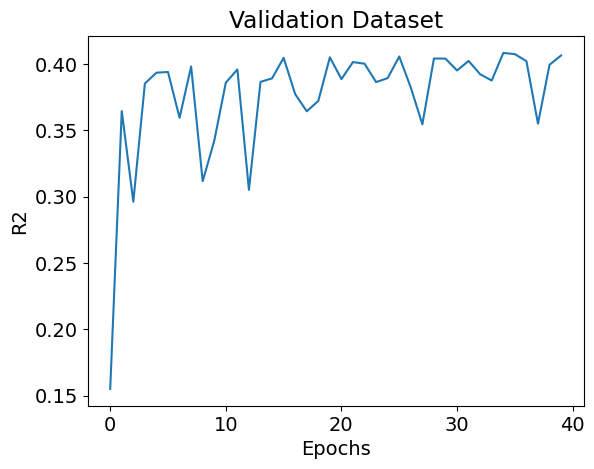

In [45]:
plt.plot(total_score)
plt.xlabel("Epochs")
plt.ylabel("R2")
plt.title("Validation Dataset")
plt.show()

- The model's learning has plateaued around 0.4, indicating that it has reached its maximum performance. 

In [46]:
#saving the weights' model

torch.save(Net.state_dict(), '/home/joaolavinas/Documents/model.pt')

In [47]:
#model weighs load
model = Model_MLP()

model.load_state_dict(torch.load('/home/joaolavinas/Documents/model.pt'))

<All keys matched successfully>

In [48]:
#test DataLoader
test_dataset = PriceDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [49]:

with torch.no_grad():
        Net.eval()

        for itter, batch in enumerate(test_loader):

            data, label = batch['data'], batch['label']
            label = torch.reshape(label, (label.shape[0],1))

            pred = Net(data)

            label = label.numpy()
            pred = pred.numpy()

            y_pred.append(pred[0])
            y_real.append(label[0])
        
        print(f"Mean Absolute Error is:{mean_absolute_error(y_real,y_pred)} and R2 is:{r2_score(y_real,y_pred)}")
        

/tmp/ipykernel_6296/3964237790.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.tensor(data)


Mean Absolute Error is:142167.46875 and R2 is:0.4146301696018576


Mean Absolute Error is:142167.46875 and R2 is:0.4146301696018576

## Conclusion <a class="anchor" id="chapter5"></a>

- Regression problems are a type of machine learning task where the goal is to predict a continuous target variable. This means that the target variable can take on any value within a range, rather than being limited to a set of discrete categories;
- The implementation of MLP, for this type of problems, could not be the best option, due to its high MAE value and lower R2;
- To identify the optimal parameter combination, a comprehensive examination of different learning rate values, higher momentum, weight decay, regularization techniques like L1 and L2, and learning rate decay is warranted; 
- Classic machine learning models have a higher performance and should be adopted for regression problems. 